<a href="https://colab.research.google.com/github/JoanYego/Supervised-and-Unsupervised-Learning-in-R/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

## Specifying the Research Question

The goal of this analysis is to use past retail data to understand customers' behavior and learn the characteristics of various customer groups.

## Defining the Metric for Success

The project will be considered a success when we are able to perform clustering and segment customers into various groups. The analysis should also compare K-Means Clustering vs Hierarchial Clustering and provide the strengths and limitations of the two approaches in the context of the project/dataset.

## Understanding the Context

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

This analysis aims to use unsupervised learning techniques in R to respond to the research question. More specifically, we will perform clustering to develop insights from analysis and visualizations. Upon implementation, we shall also provide comparisons between two approaches i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of the analysis. The findings should help inform the team in formulating the marketing and sales strategies of the brand. 

## Recording the Exprimental Design

Below are the steps that will be followed in this analysis in order to respond to the research question satisfactorily:

>* Read the Data
>* Check the Data
>* Perform Data Cleaning
>* Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
>* Implement the Solution
>* Challenge the Solution


## Data Relevance

- The dataset used in this analysis consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
- The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# Importing Relevant Libraries

In [1]:
# Installing relevant packages

install.packages("data.table", dependencies=TRUE)
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("reshape",dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘R.oo’, ‘R.methodsS3’, ‘RcppCCTZ’, ‘RcppDate’, ‘bit64’, ‘R.utils’, ‘xts’, ‘nanotime’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [2]:
# Loading the libraries

library(data.table)
library(ggplot2)
library(tidyverse)
library(reshape)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:data.table’:

    melt




# Reading the Data

In [3]:
# Reading the data into R from the csv file

retail <- read.csv('online_shoppers_intention.csv')
retail

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,64.000000,0.000000000,0.100000000,0.00000,0.0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,2.666667,0.050000000,0.140000000,0.00000,0.0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,10,627.500000,0.020000000,0.050000000,0.00000,0.0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,19,154.216667,0.015789474,0.024561404,0.00000,0.0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
0,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
1,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,2,37.000000,0.000000000,0.100000000,0.00000,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE


# Checking the Data

In [4]:
# Checking the top 6 records 

head(retail)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [38]:
# Checking the bottom 6 records

tail(retail)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [39]:
# Checking the total number of records

nrow(retail)

[1] 12330

In [12]:
# Checking the total number of columns

ncol(retail)

[1] 18

In [6]:
# Checking all column names

names(retail)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [5]:
# Checking the data types of each column

str(retail)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning

In [40]:
# Checking the number of unique values in each column

lengths(lapply(retail, unique))

Administrative Administrative_Duration           Informational 
                     28                    3337                      18 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                   1260                     312                    9553 
            BounceRates               ExitRates              PageValues 
                   1873                    4778                    2704 
             SpecialDay                   Month        OperatingSystems 
                      6                      10                       8 
                Browser                  Region             TrafficType 
                     13                       9                      20 
            VisitorType                 Weekend                 Revenue 
                      3                       2                       2

- The data spans 10 different months with customers from 9 different regions.


In [7]:
# Checking the summary of the data

summary(retail)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

# Data Cleaning

Missing Data

In [8]:
# Checking the existence of missing values

colSums(is.na(retail))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

- There are a few missing values in several columns.

In [9]:
# Dropping missing values

retail = na.omit(retail)

In [10]:
# Checking for duplicate values

duplicated_rows <- retail[duplicated(retail),]
duplicated_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
555,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
590,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
660,0,0,0,0,2,0,0.2,0.2,0,0,Mar,2,5,1,1,Returning_Visitor,FALSE,FALSE


- These do not seem like true duplicates so will retain them in the analysis.

Outliers

In [11]:
# Creating a variable with only numeric attributes

retail_num <- retail[ , unlist(lapply(retail, is.numeric))]     

Using  as id variables



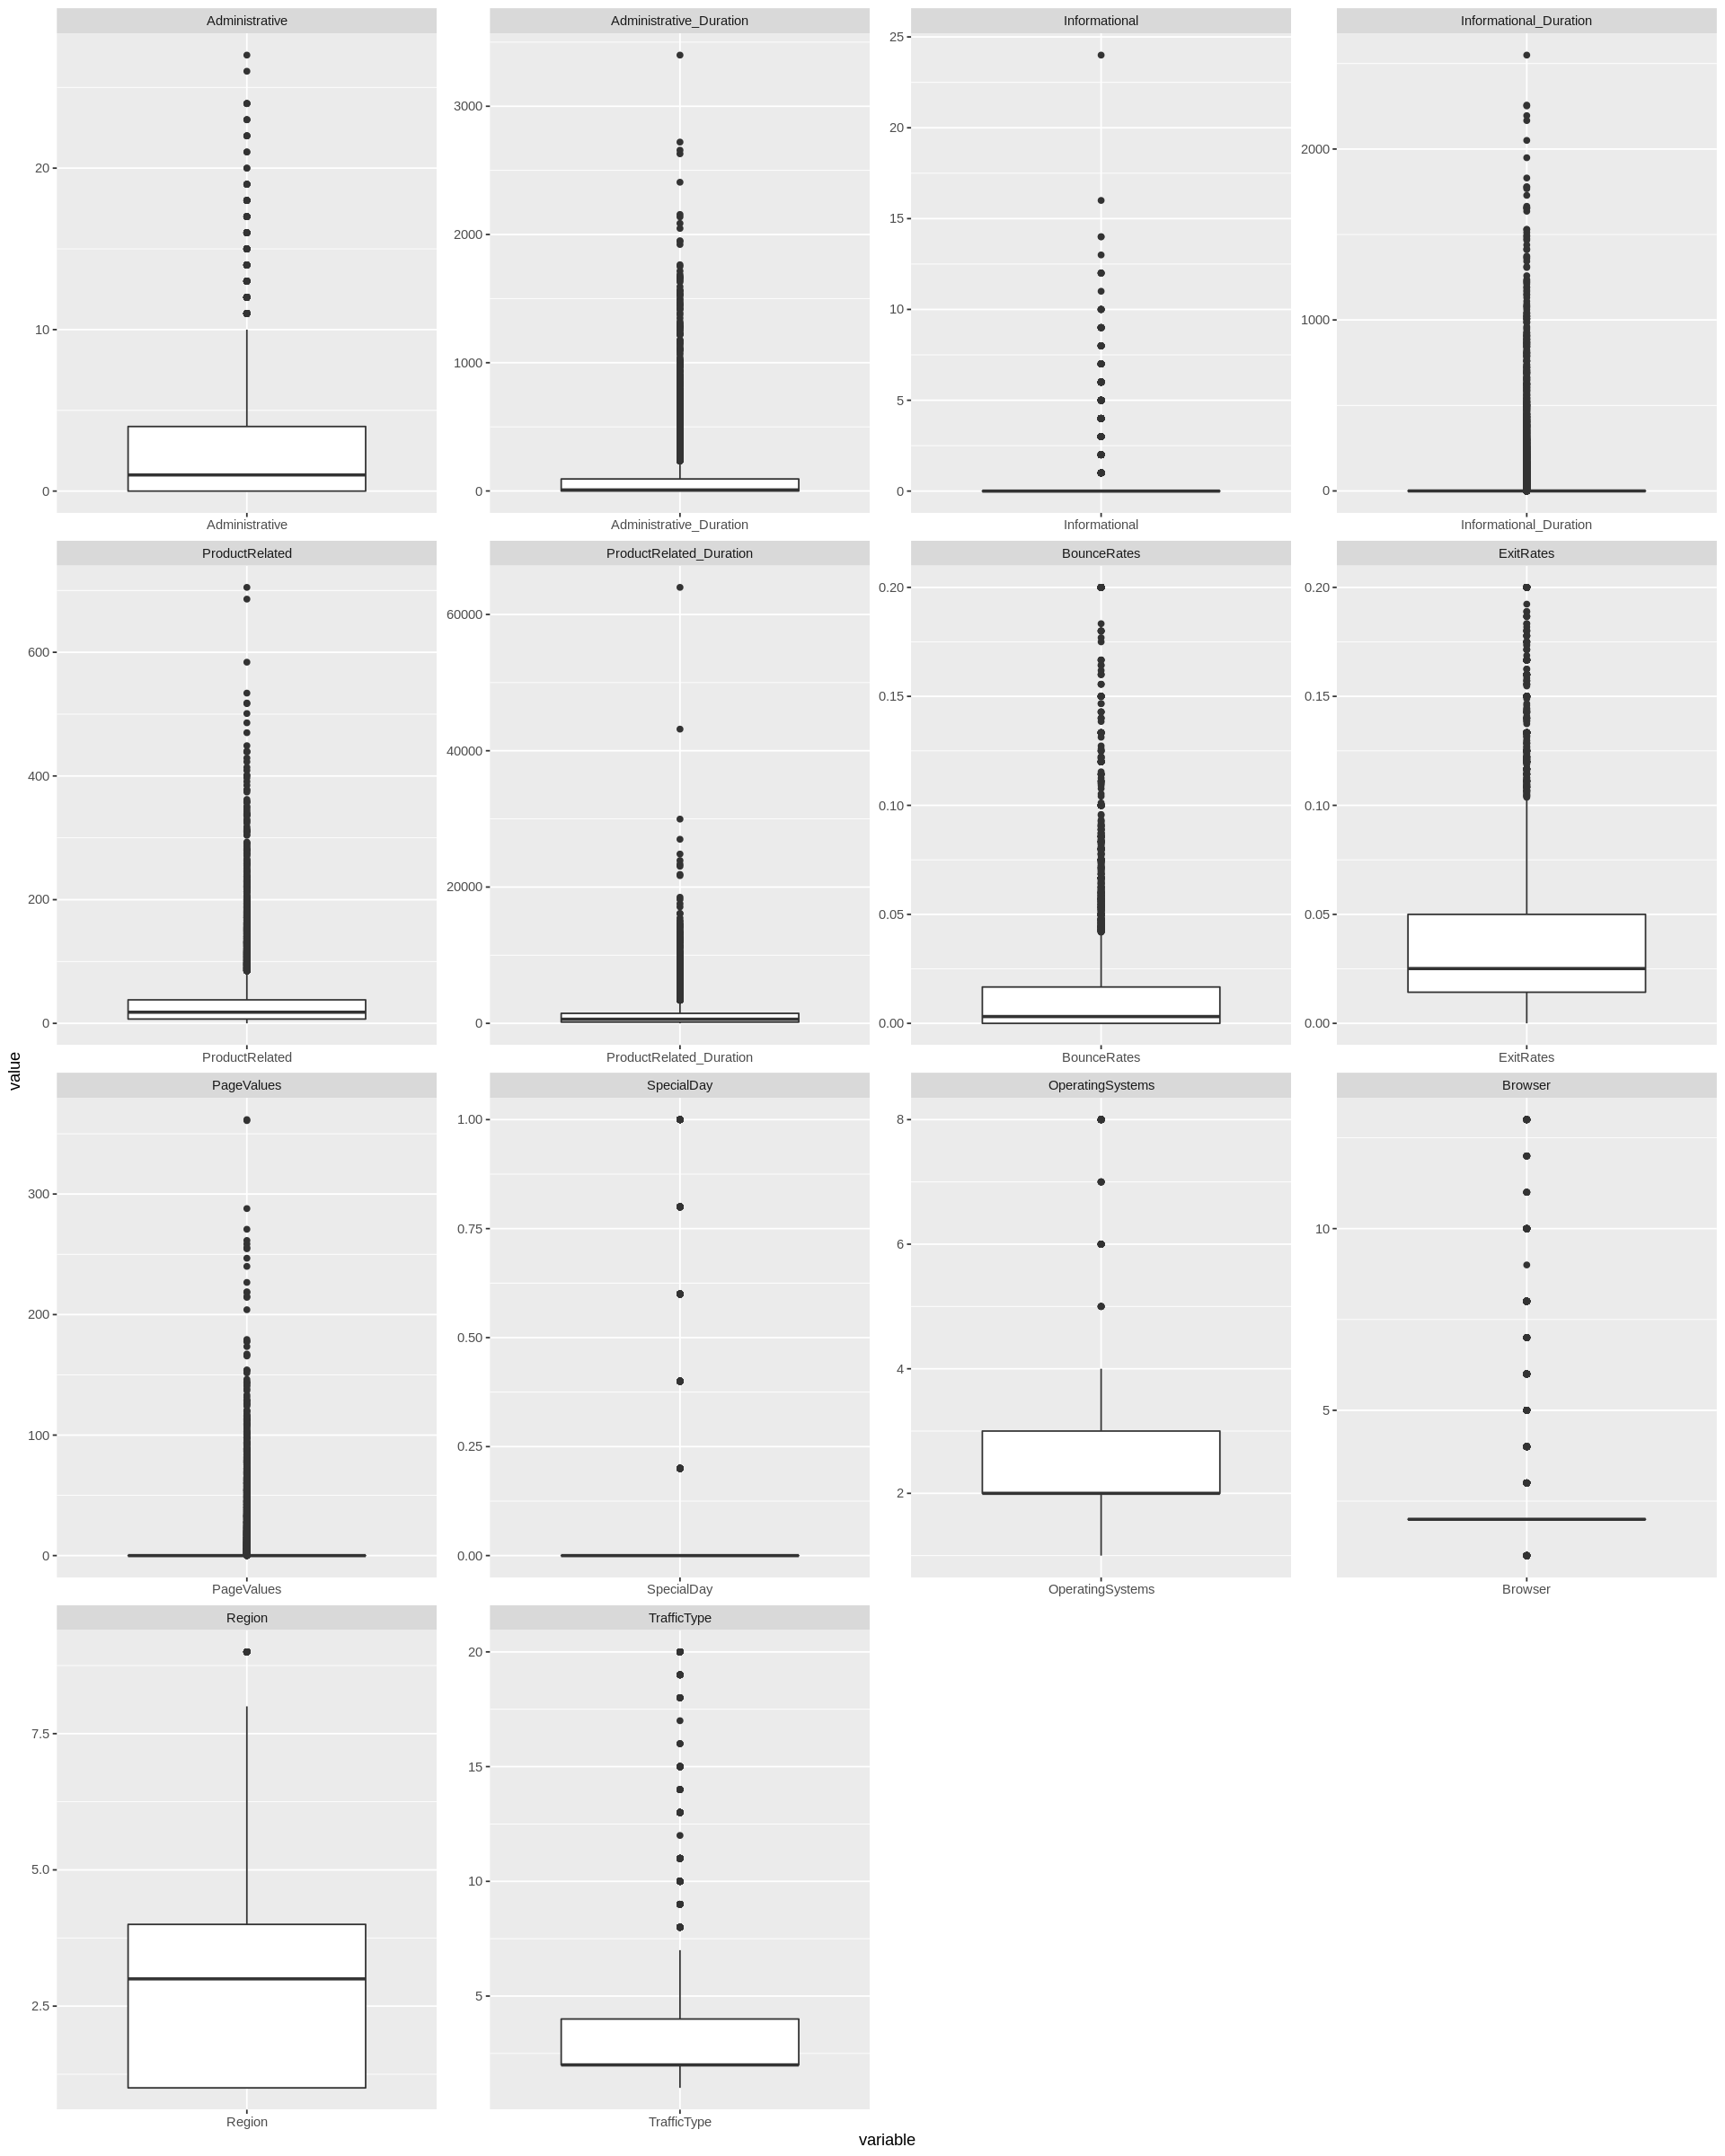

In [12]:
# Plotting boxplots to check for outliers

options(repr.plot.width = 16, repr.plot.height = 20)
ggplot(melt(retail_num), aes(variable, value))+ geom_boxplot() + facet_wrap(~variable, scale="free")

- From the above graph, all numeric attributes have outliers but we will not drop them since they are valid observations.

# Exploratory Data Analysis

## Univariate Analysis

- In this section, we will investigate each variable individually. The steps here include calculating and interpreting measures of central tendency (mode, median, mean) as well as computing and explaining the range, the interquartile range, the standard deviation, variance, skewness, and kurtosis

In [13]:
install.packages("fBasics", dependencies=TRUE)
library('fBasics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’, ‘akima’, ‘RUnit’


Loading required package: timeDate

Loading required package: timeSeries



In [14]:
# Calculating the mean for all numeric columns

colMeans(retail_num)

Administrative Administrative_Duration           Informational 
           2.317798e+00            8.090618e+01            5.039786e-01 
 Informational_Duration          ProductRelated ProductRelated_Duration 
           3.450639e+01            3.176388e+01            1.196037e+03 
            BounceRates               ExitRates              PageValues 
           2.215246e-02            4.300254e-02            5.895952e+00 
             SpecialDay        OperatingSystems                 Browser 
           6.149724e-02            2.124147e+00            2.357584e+00 
                 Region             TrafficType 
           3.148019e+00            4.070477e+00

In [15]:
# Calculating the mode for all numeric columns

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
lapply(retail_num,FUN=getmode)

$Administrative
[1] 0

$Administrative_Duration
[1] 0

$Informational
[1] 0

$Informational_Duration
[1] 0

$ProductRelated
[1] 1

$ProductRelated_Duration
[1] 0

$BounceRates
[1] 0

$ExitRates
[1] 0.2

$PageValues
[1] 0

$SpecialDay
[1] 0

$OperatingSystems
[1] 2

$Browser
[1] 2

$Region
[1] 1

$TrafficType
[1] 2

- Most popular region is 1 and the most popular browser used by customers is 2.

In [16]:
# Calculating the minimum value for all numeric columns

colMins(retail_num)

Administrative Administrative_Duration           Informational 
                      0                      -1                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     -1                       0                      -1 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay        OperatingSystems                 Browser 
                      0                       1                       1 
                 Region             TrafficType 
                      1                       1

In [75]:
# Calculating the maximum value for all numeric columns

colMaxs(retail_num)

Administrative Administrative_Duration           Informational 
                27.0000               3398.7500                 24.0000 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              2549.3750                705.0000              63973.5222 
            BounceRates               ExitRates              PageValues 
                 0.2000                  0.2000                361.7637 
             SpecialDay        OperatingSystems                 Browser 
                 1.0000                  8.0000                 13.0000 
                 Region             TrafficType 
                 9.0000                 20.0000

In [77]:
# Checking the range for all numeric columns

lapply(retail_num,FUN=range)

$Administrative
[1]  0 27

$Administrative_Duration
[1]   -1.00 3398.75

$Informational
[1]  0 24

$Informational_Duration
[1]   -1.000 2549.375

$ProductRelated
[1]   0 705

$ProductRelated_Duration
[1]    -1.00 63973.52

$BounceRates
[1] 0.0 0.2

$ExitRates
[1] 0.0 0.2

$PageValues
[1]   0.0000 361.7637

$SpecialDay
[1] 0 1

$OperatingSystems
[1] 1 8

$Browser
[1]  1 13

$Region
[1] 1 9

$TrafficType
[1]  1 20

In [79]:
# Calculating the quantiles for all numeric columns

lapply(retail_num,FUN=quantile)

$Administrative
  0%  25%  50%  75% 100% 
   0    0    1    4   27 

$Administrative_Duration
     0%     25%     50%     75%    100% 
  -1.00    0.00    8.00   93.50 3398.75 

$Informational
  0%  25%  50%  75% 100% 
   0    0    0    0   24 

$Informational_Duration
      0%      25%      50%      75%     100% 
  -1.000    0.000    0.000    0.000 2549.375 

$ProductRelated
  0%  25%  50%  75% 100% 
   0    7   18   38  705 

$ProductRelated_Duration
        0%        25%        50%        75%       100% 
   -1.0000   185.0000   599.7662  1466.4799 63973.5222 

$BounceRates
         0%         25%         50%         75%        100% 
0.000000000 0.000000000 0.003119412 0.016683674 0.200000000 

$ExitRates
        0%        25%        50%        75%       100% 
0.00000000 0.01428571 0.02512449 0.05000000 0.20000000 

$PageValues
      0%      25%      50%      75%     100% 
  0.0000   0.0000   0.0000   0.0000 361.7637 

$SpecialDay
  0%  25%  50%  75% 100% 
   0    0    0    0    1 

$OperatingSystems
  0%  25%  50%  75% 100% 
   1    2    2    3    8 

$Browser
  0%  25%  50%  75% 100% 
   1    2    2    2   13 

$Region
  0%  25%  50%  75% 100% 
   1    1    3    4    9 

$TrafficType
  0%  25%  50%  75% 100% 
   1    2    2    4   20

In [80]:
# Calculating the variance for all numeric columns

colVars(retail_num)

Administrative Administrative_Duration           Informational 
           1.104069e+01            3.127961e+04            1.614682e+00 
 Informational_Duration          ProductRelated ProductRelated_Duration 
           1.983182e+04            1.979390e+03            3.664822e+06 
            BounceRates               ExitRates              PageValues 
           2.345187e-03            2.354899e-03            3.451393e+02 
             SpecialDay        OperatingSystems                 Browser 
           3.960877e-02            8.309524e-01            2.951620e+00 
                 Region             TrafficType 
           5.770618e+00            1.619739e+01

In [81]:
# Calculating the standard deviation for all numeric columns

colStdevs(retail_num)

Administrative Administrative_Duration           Informational 
           3.322754e+00            1.768604e+02            1.270701e+00 
 Informational_Duration          ProductRelated ProductRelated_Duration 
           1.408255e+02            4.449034e+01            1.914373e+03 
            BounceRates               ExitRates              PageValues 
           4.842713e-02            4.852730e-02            1.857793e+01 
             SpecialDay        OperatingSystems                 Browser 
           1.990195e-01            9.115659e-01            1.718028e+00 
                 Region             TrafficType 
           2.402211e+00            4.024598e+00

In [82]:
# Calculating the kurtosis for all numeric columns

colKurtosis(retail_num)

Administrative Administrative_Duration           Informational 
              4.6907860              50.4782636              26.8932902 
 Informational_Duration          ProductRelated ProductRelated_Duration 
             76.1837621              31.1734028             137.0288845 
            BounceRates               ExitRates              PageValues 
              7.7489581               4.0367398              65.5260334 
             SpecialDay        OperatingSystems                 Browser 
              9.8905554              10.4489359              12.7250323 
                 Region             TrafficType 
             -0.1508587               3.4794677

- Most numeric attributes have more values in the distribution tails and more values close to the mean i.e. sharply peaked with heavy tails. This is illustrated by the large kurtosis values.

In [83]:
# Calculating the skewness for all numeric columns

colSkewness(retail_num)

Administrative Administrative_Duration           Informational 
              1.9583993               5.6115939               4.0338396 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              7.5729370               4.3391653               7.2599228 
            BounceRates               ExitRates              PageValues 
              2.9517471               2.1522289               6.3778360 
             SpecialDay        OperatingSystems                 Browser 
              3.2995054               2.0662685               3.2401958 
                 Region             TrafficType 
              0.9830298               1.9626969

ERROR: ignored

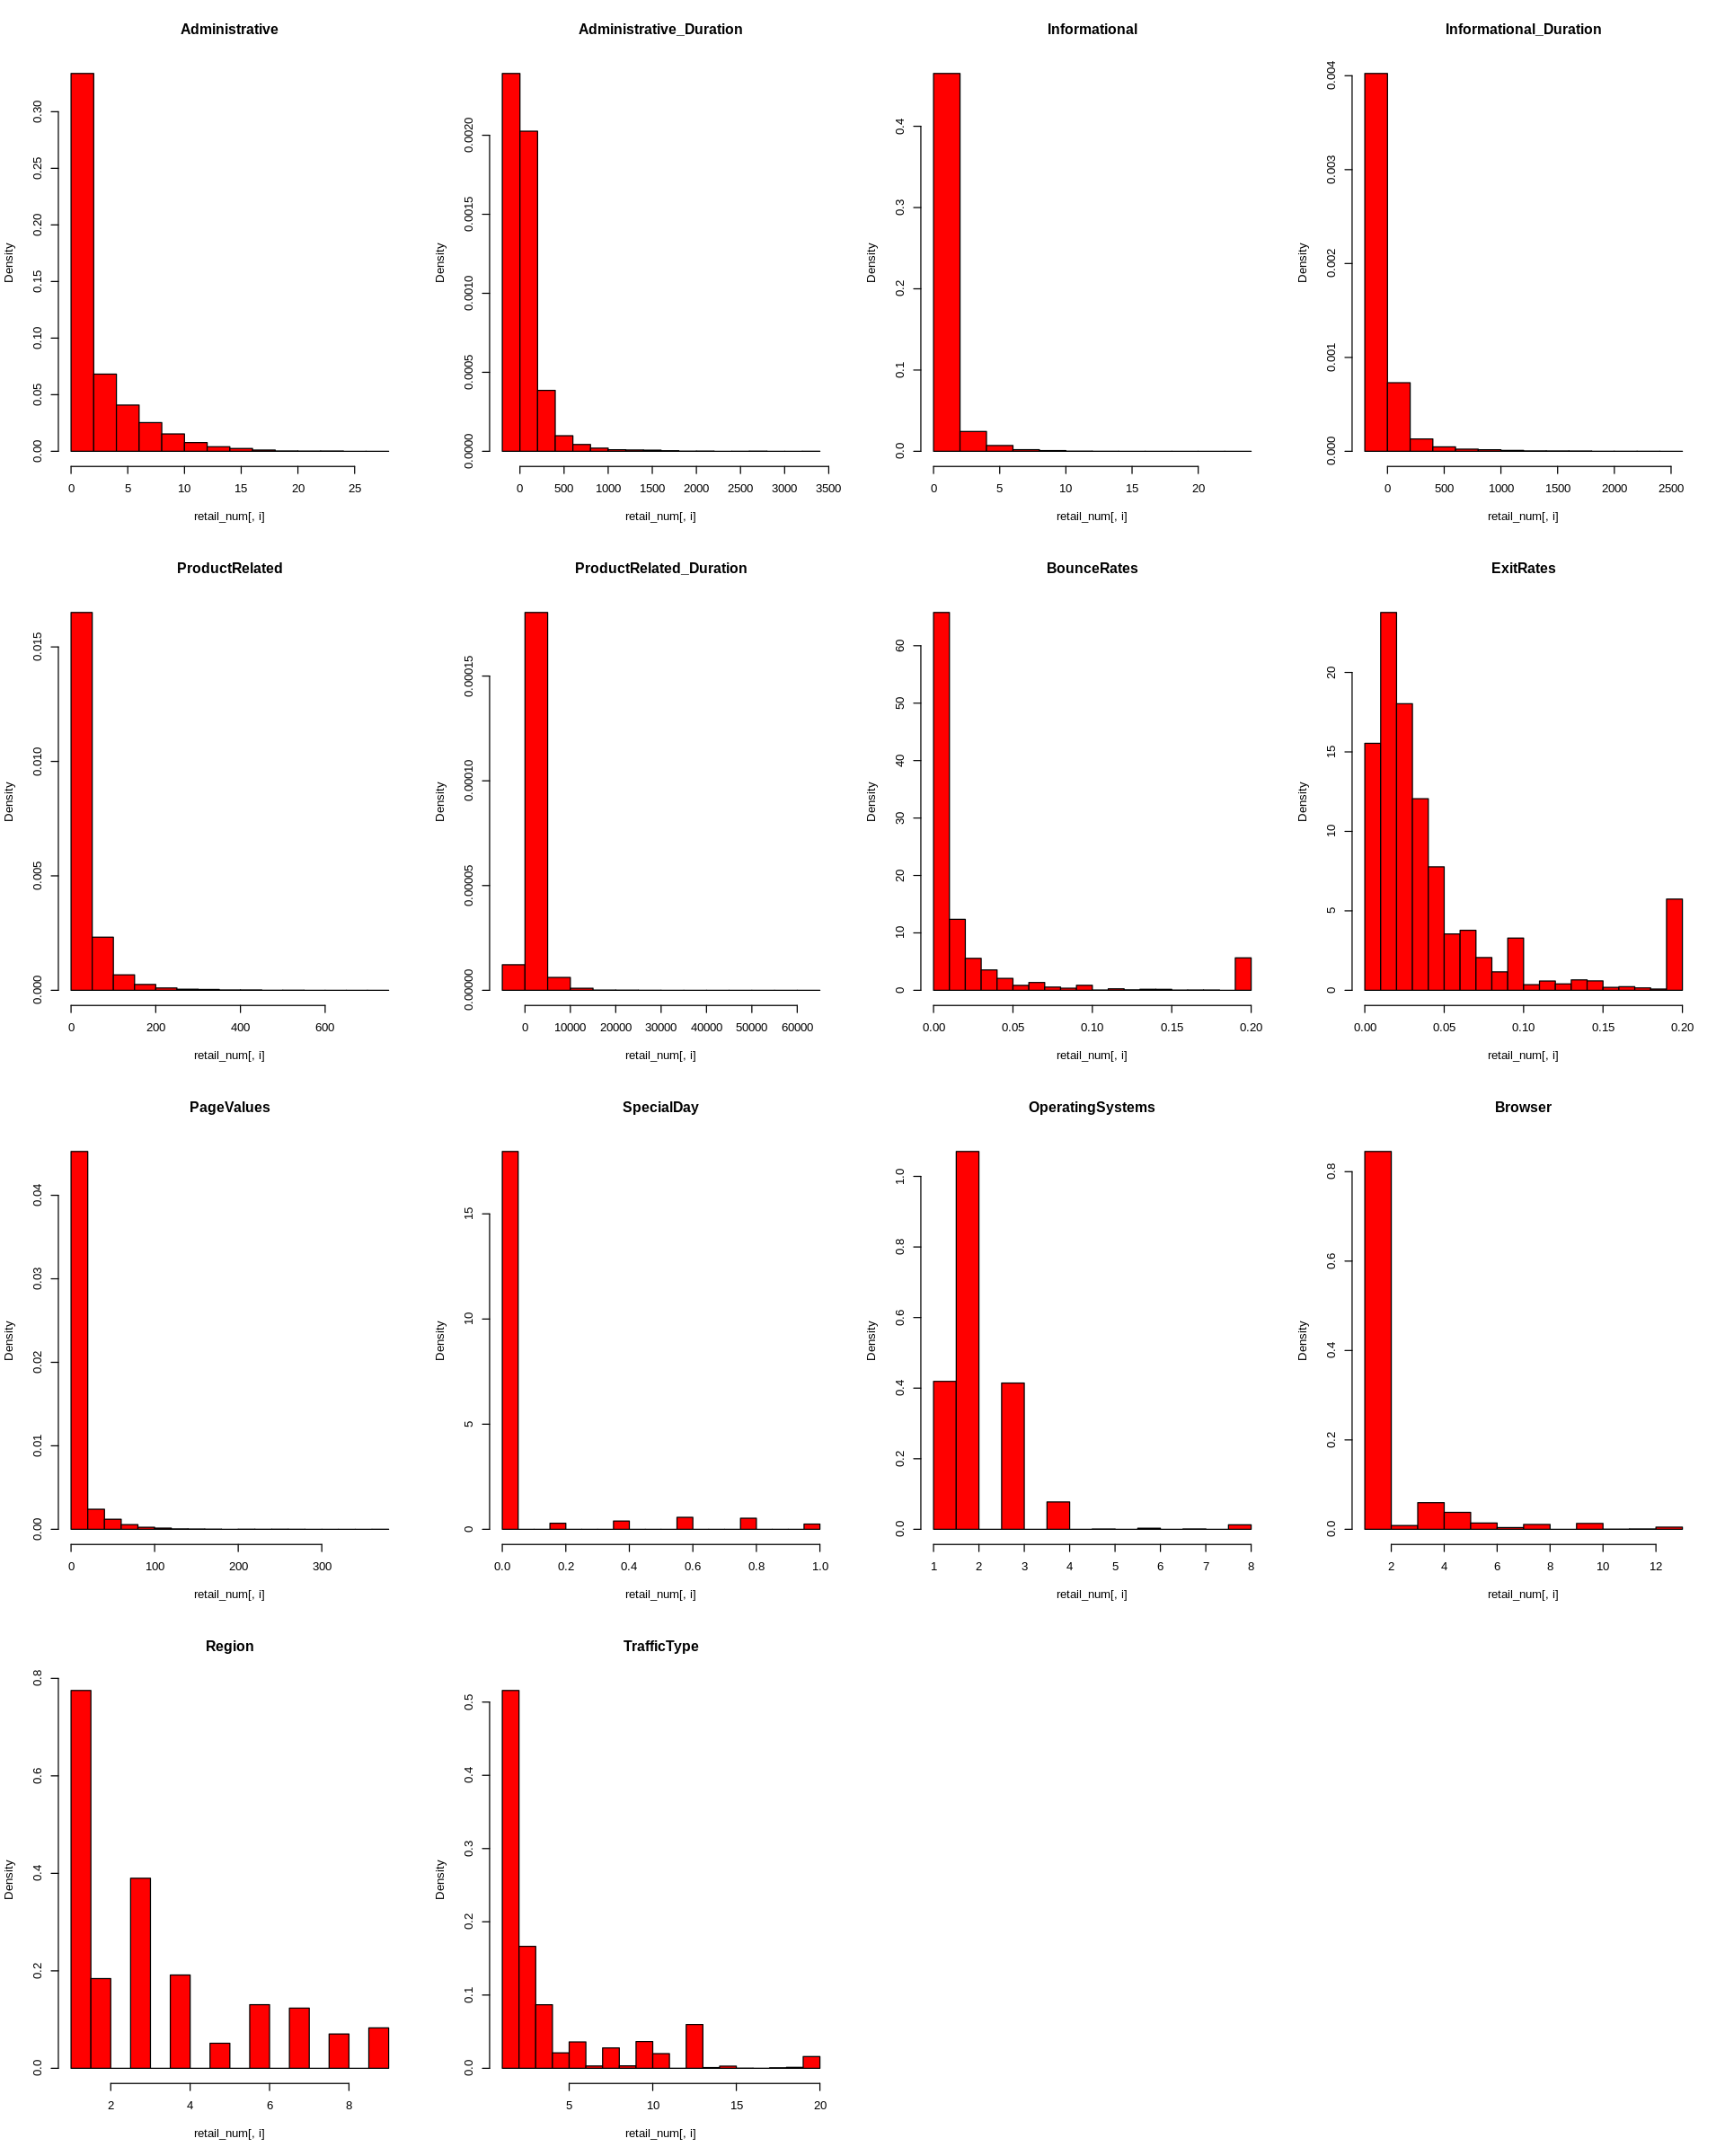

In [37]:
# Plotting histograms to check distributions of numeric attributes

par(mfrow=c(4,4))
colnames <- dimnames(retail_num)[[2]]
for (i in 1:15) {
    hist(retail_num[,i], main=colnames[i], probability=TRUE, col="red", border="black")
}


ERROR: ignored

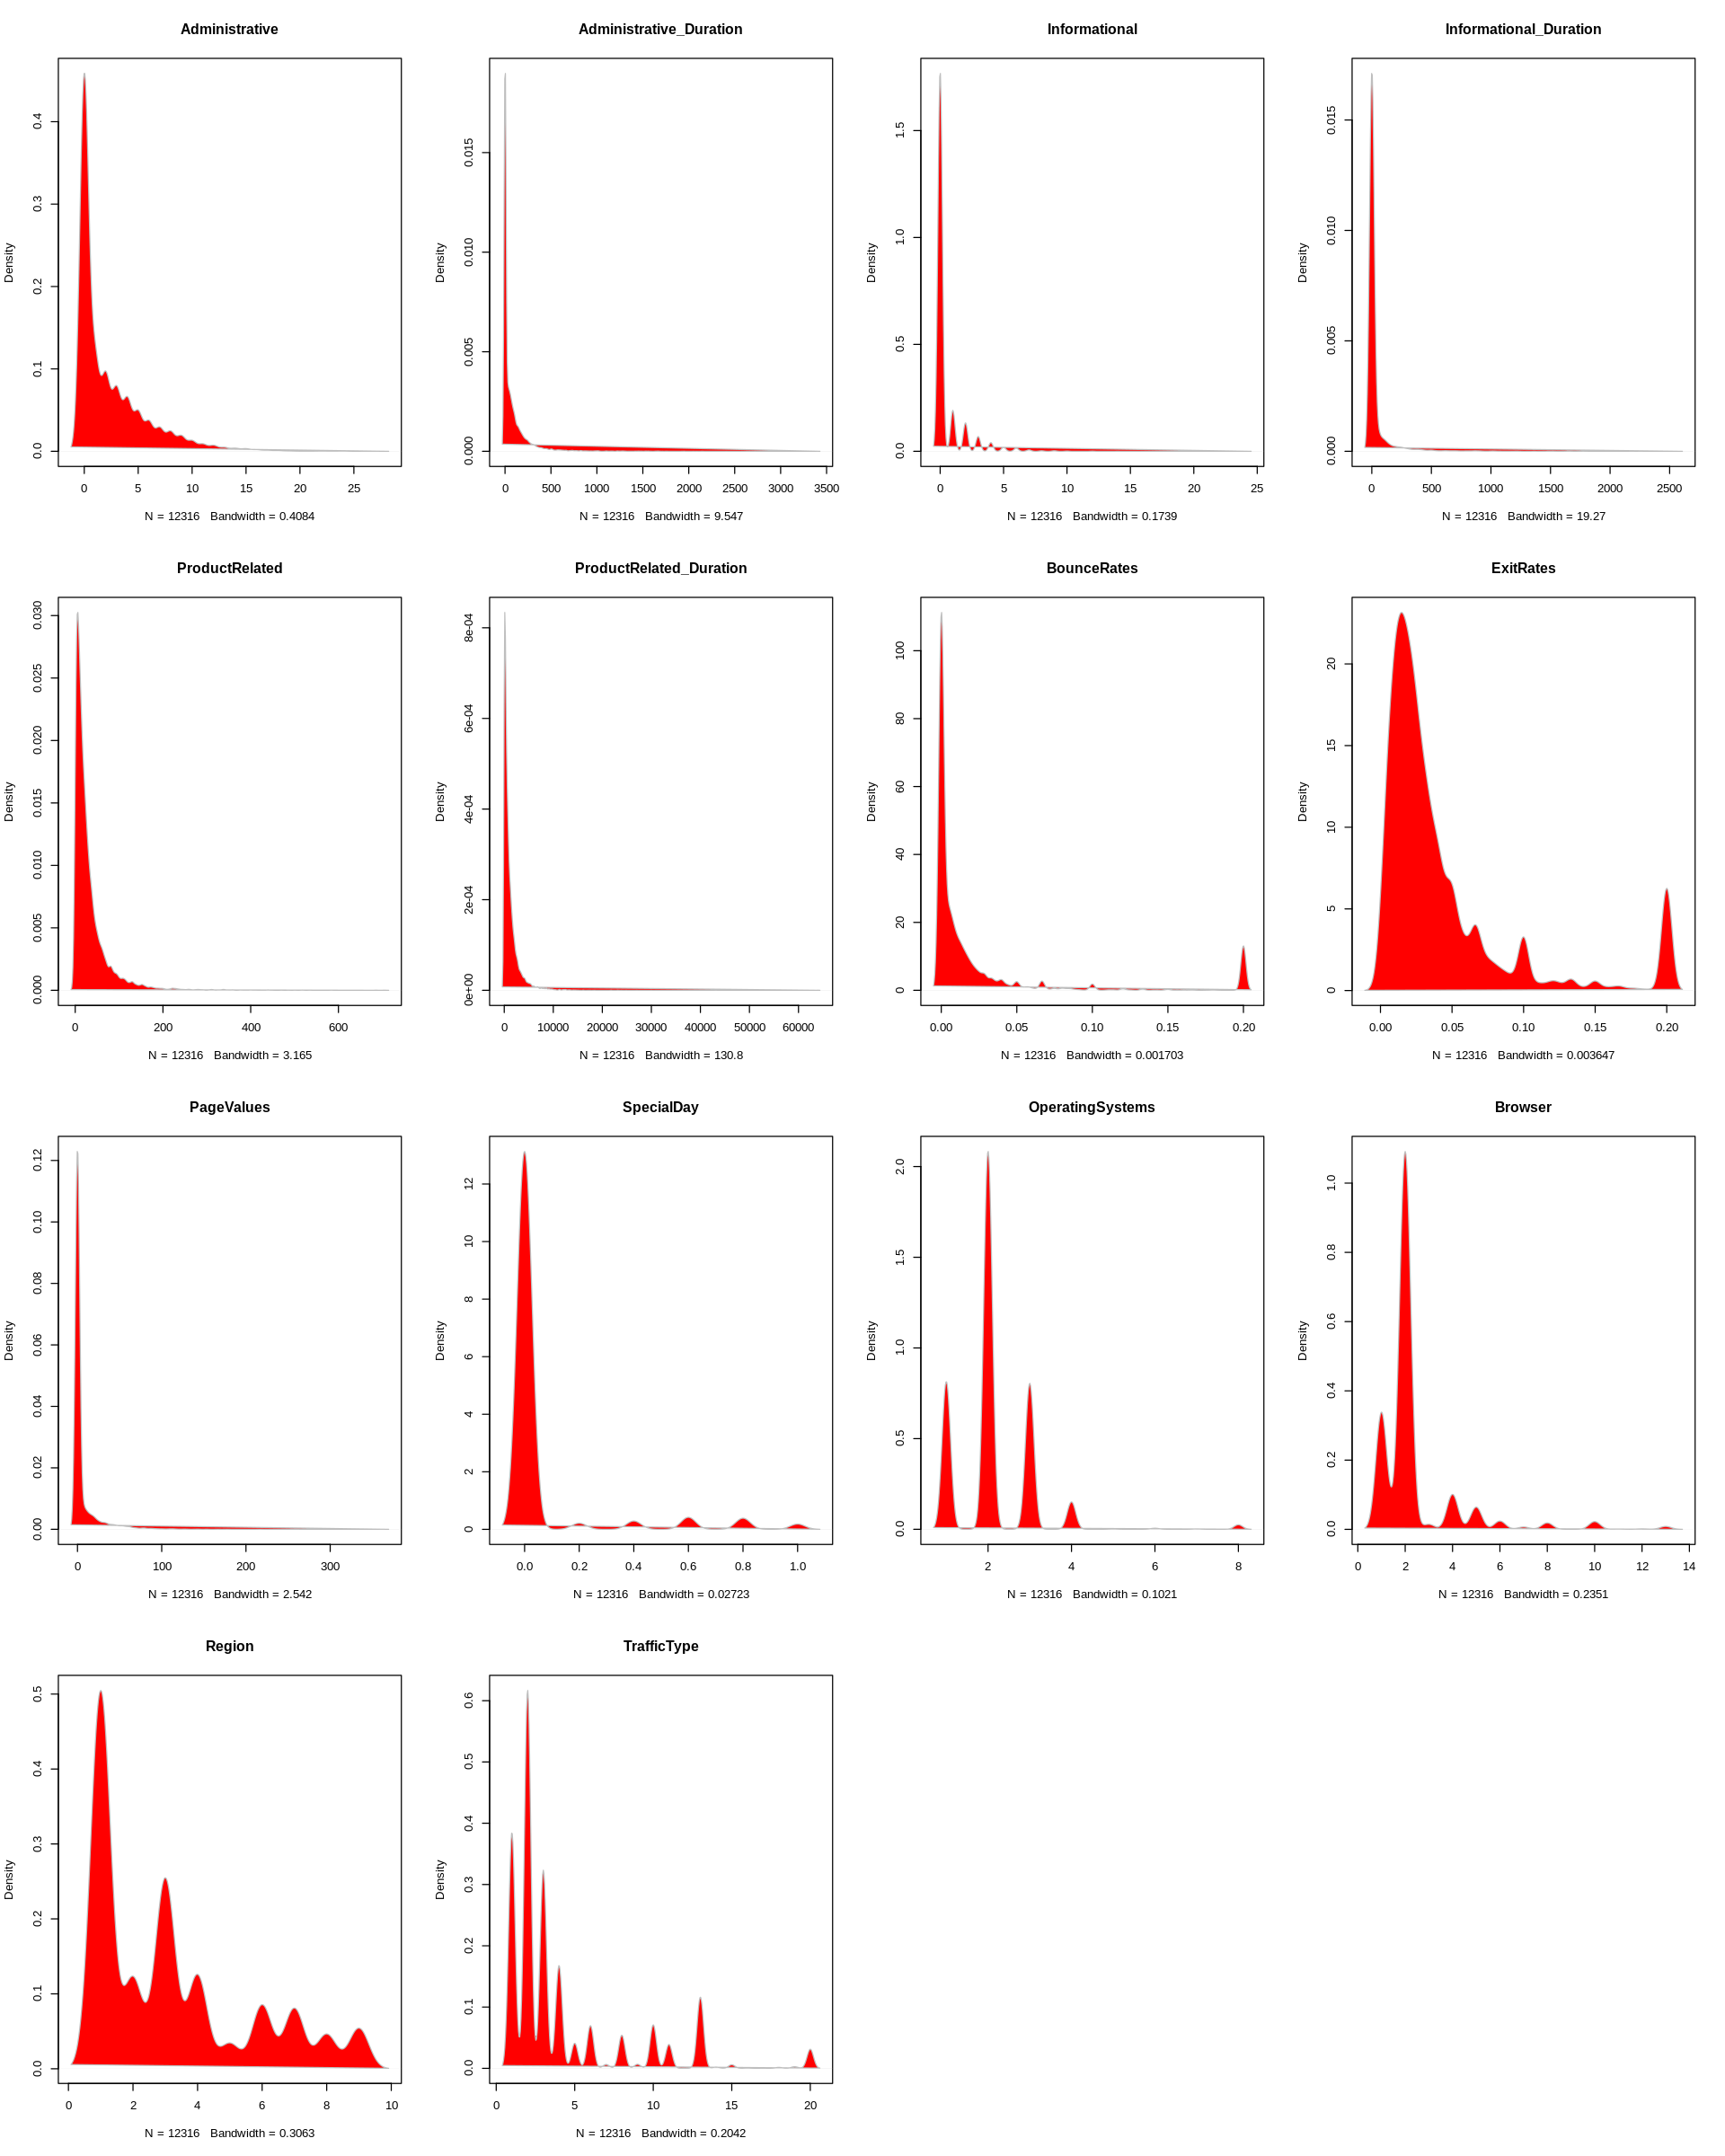

In [38]:
# Density plot
par(mfrow=c(4, 4))
colnames <- dimnames(retail_num)[[2]]
for (i in 1:15) {
    d <- density(retail_num[,i])
    plot(d, type="n", main=colnames[i])
    polygon(d, col="red", border="gray")
}


In [42]:
head(retail)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


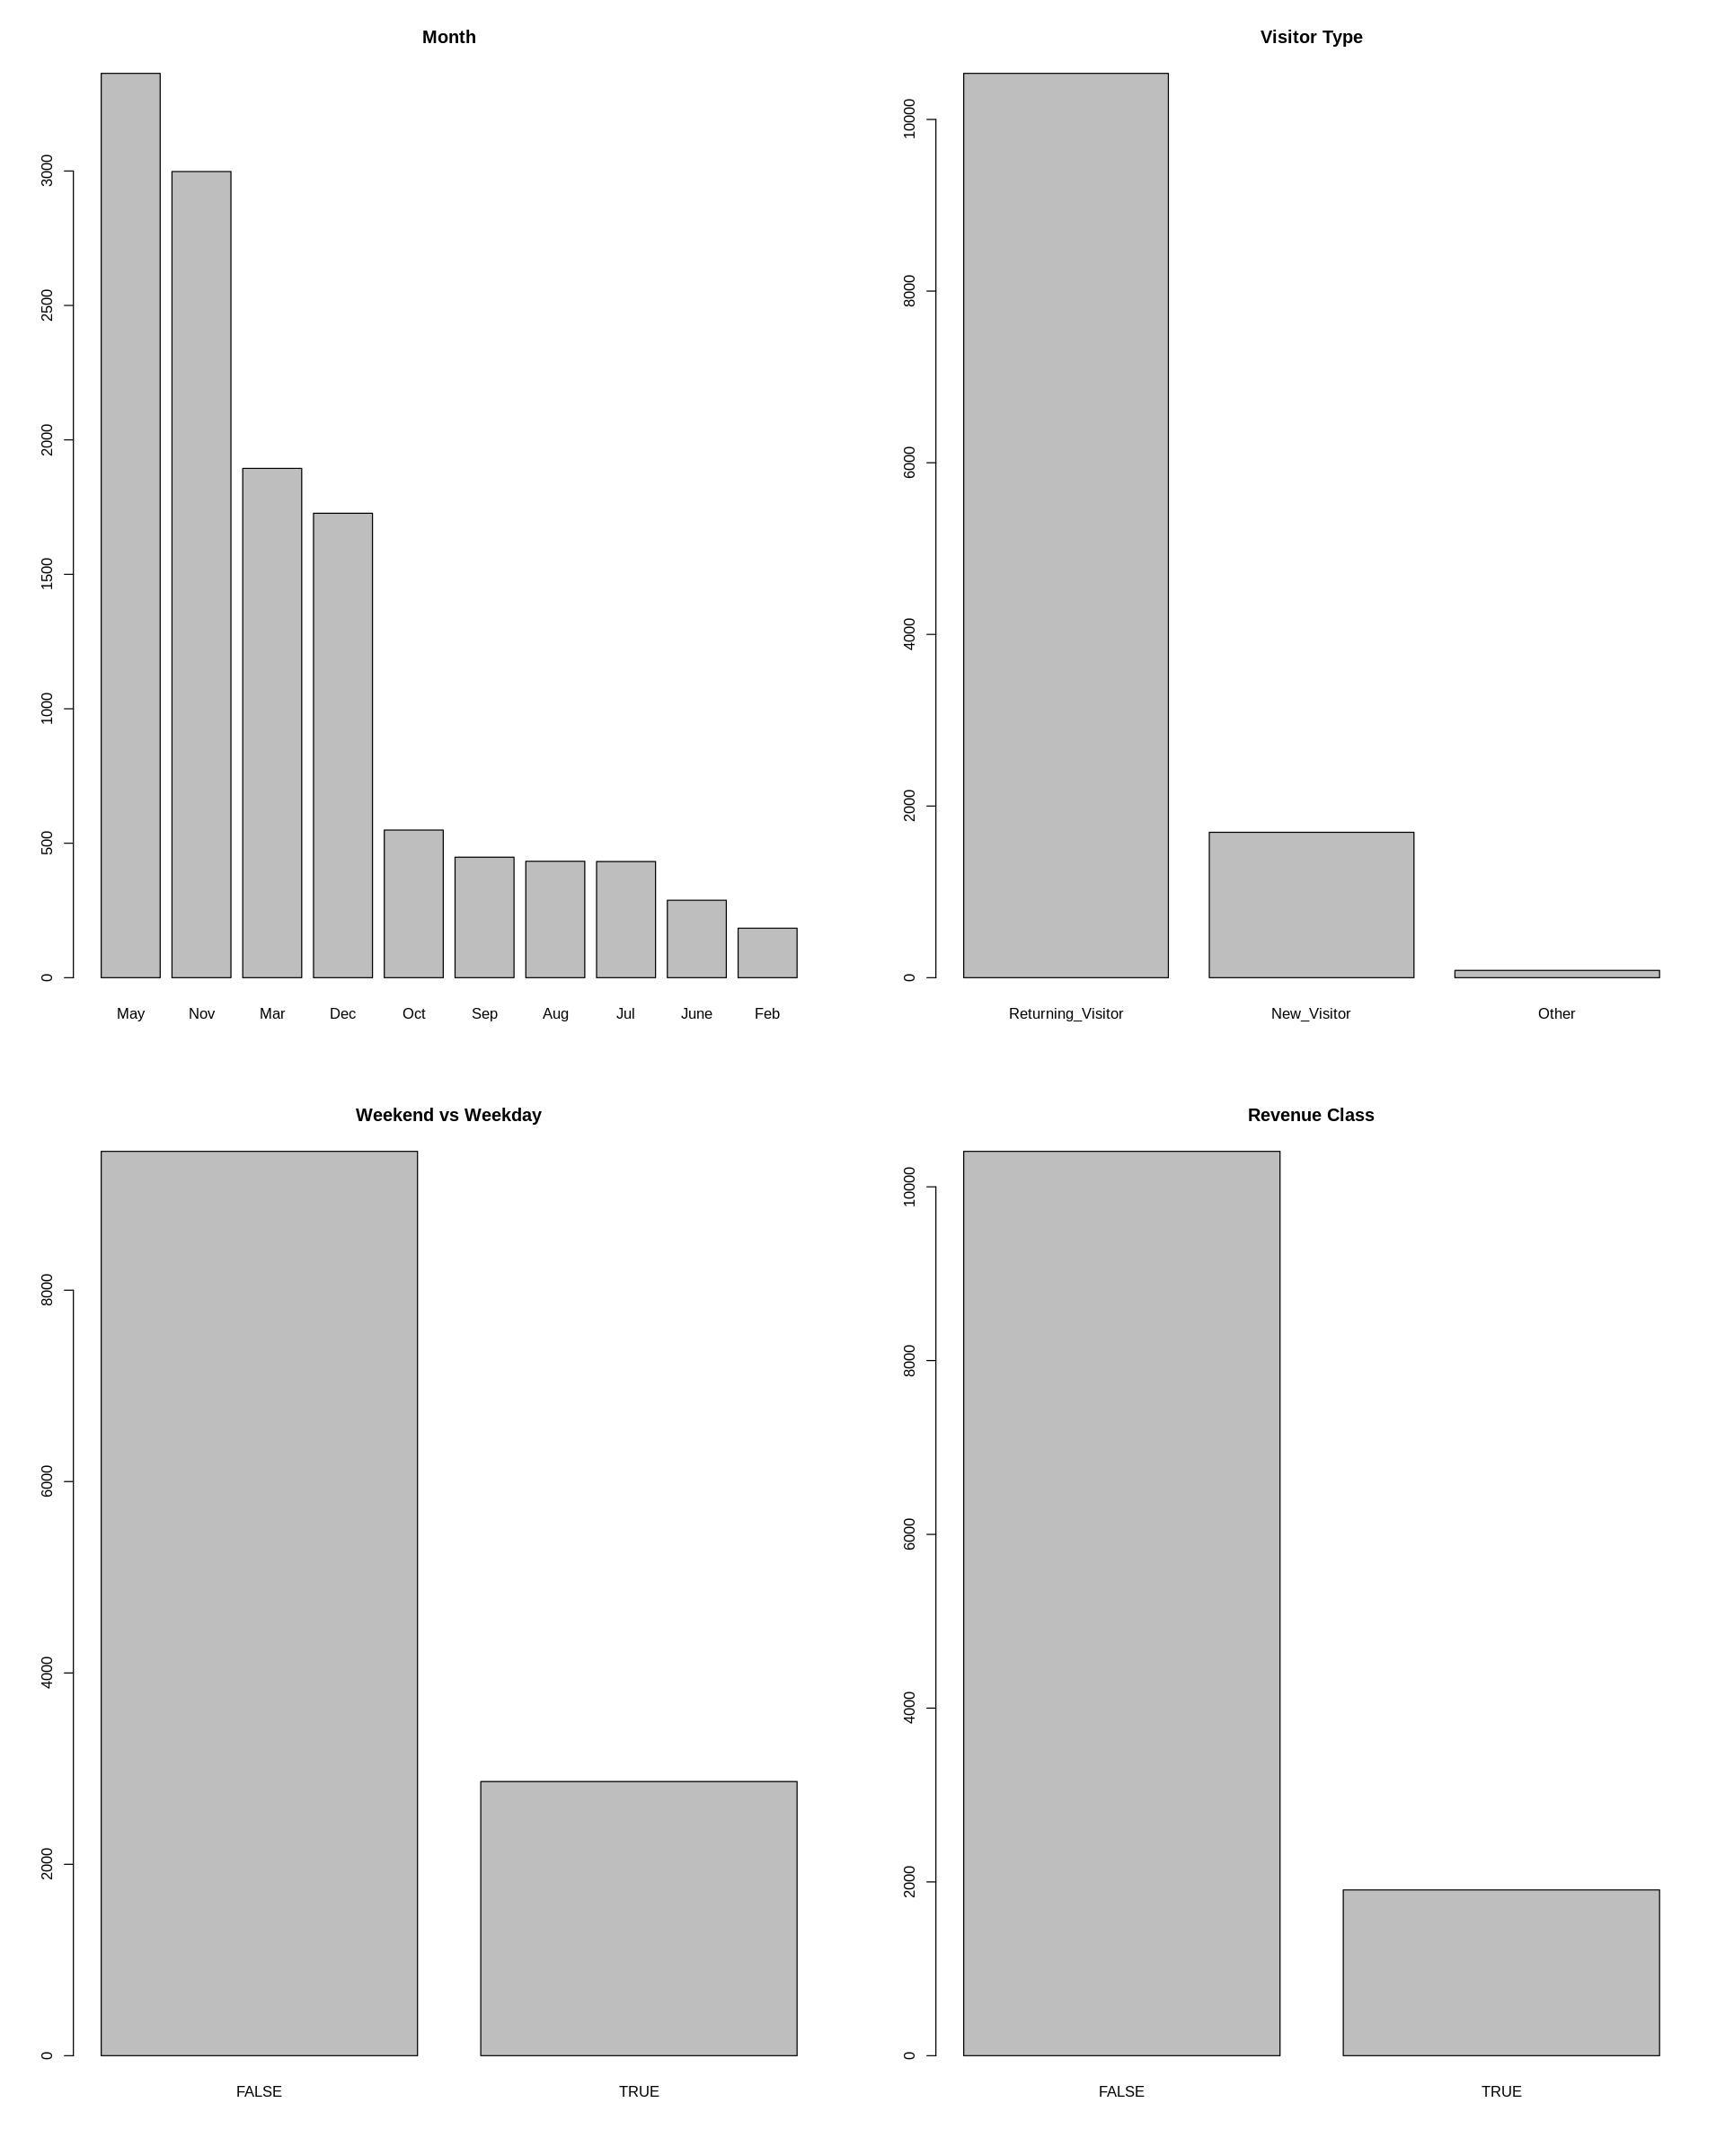

In [49]:
# Bar plot of categorical attributes

par(mfrow=c(2,2))
colnames <- dimnames(retail)[[2]]
barplot(sort(table(retail$Month), decreasing=T),main='Month')
barplot(sort(table(retail$VisitorType), decreasing=T), main = 'Visitor Type')
barplot(sort(table(retail$Weekend), decreasing=T), main = 'Weekend vs Weekday')
barplot(sort(table(retail$Revenue), decreasing=T), main = 'Revenue Class')

## Bivariate Analysis

In this section, we investigate the relationship of different variables by creating relevant visualizations such as scatter plots, correlation matrix and Pearson correlation coefficient. 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape2’




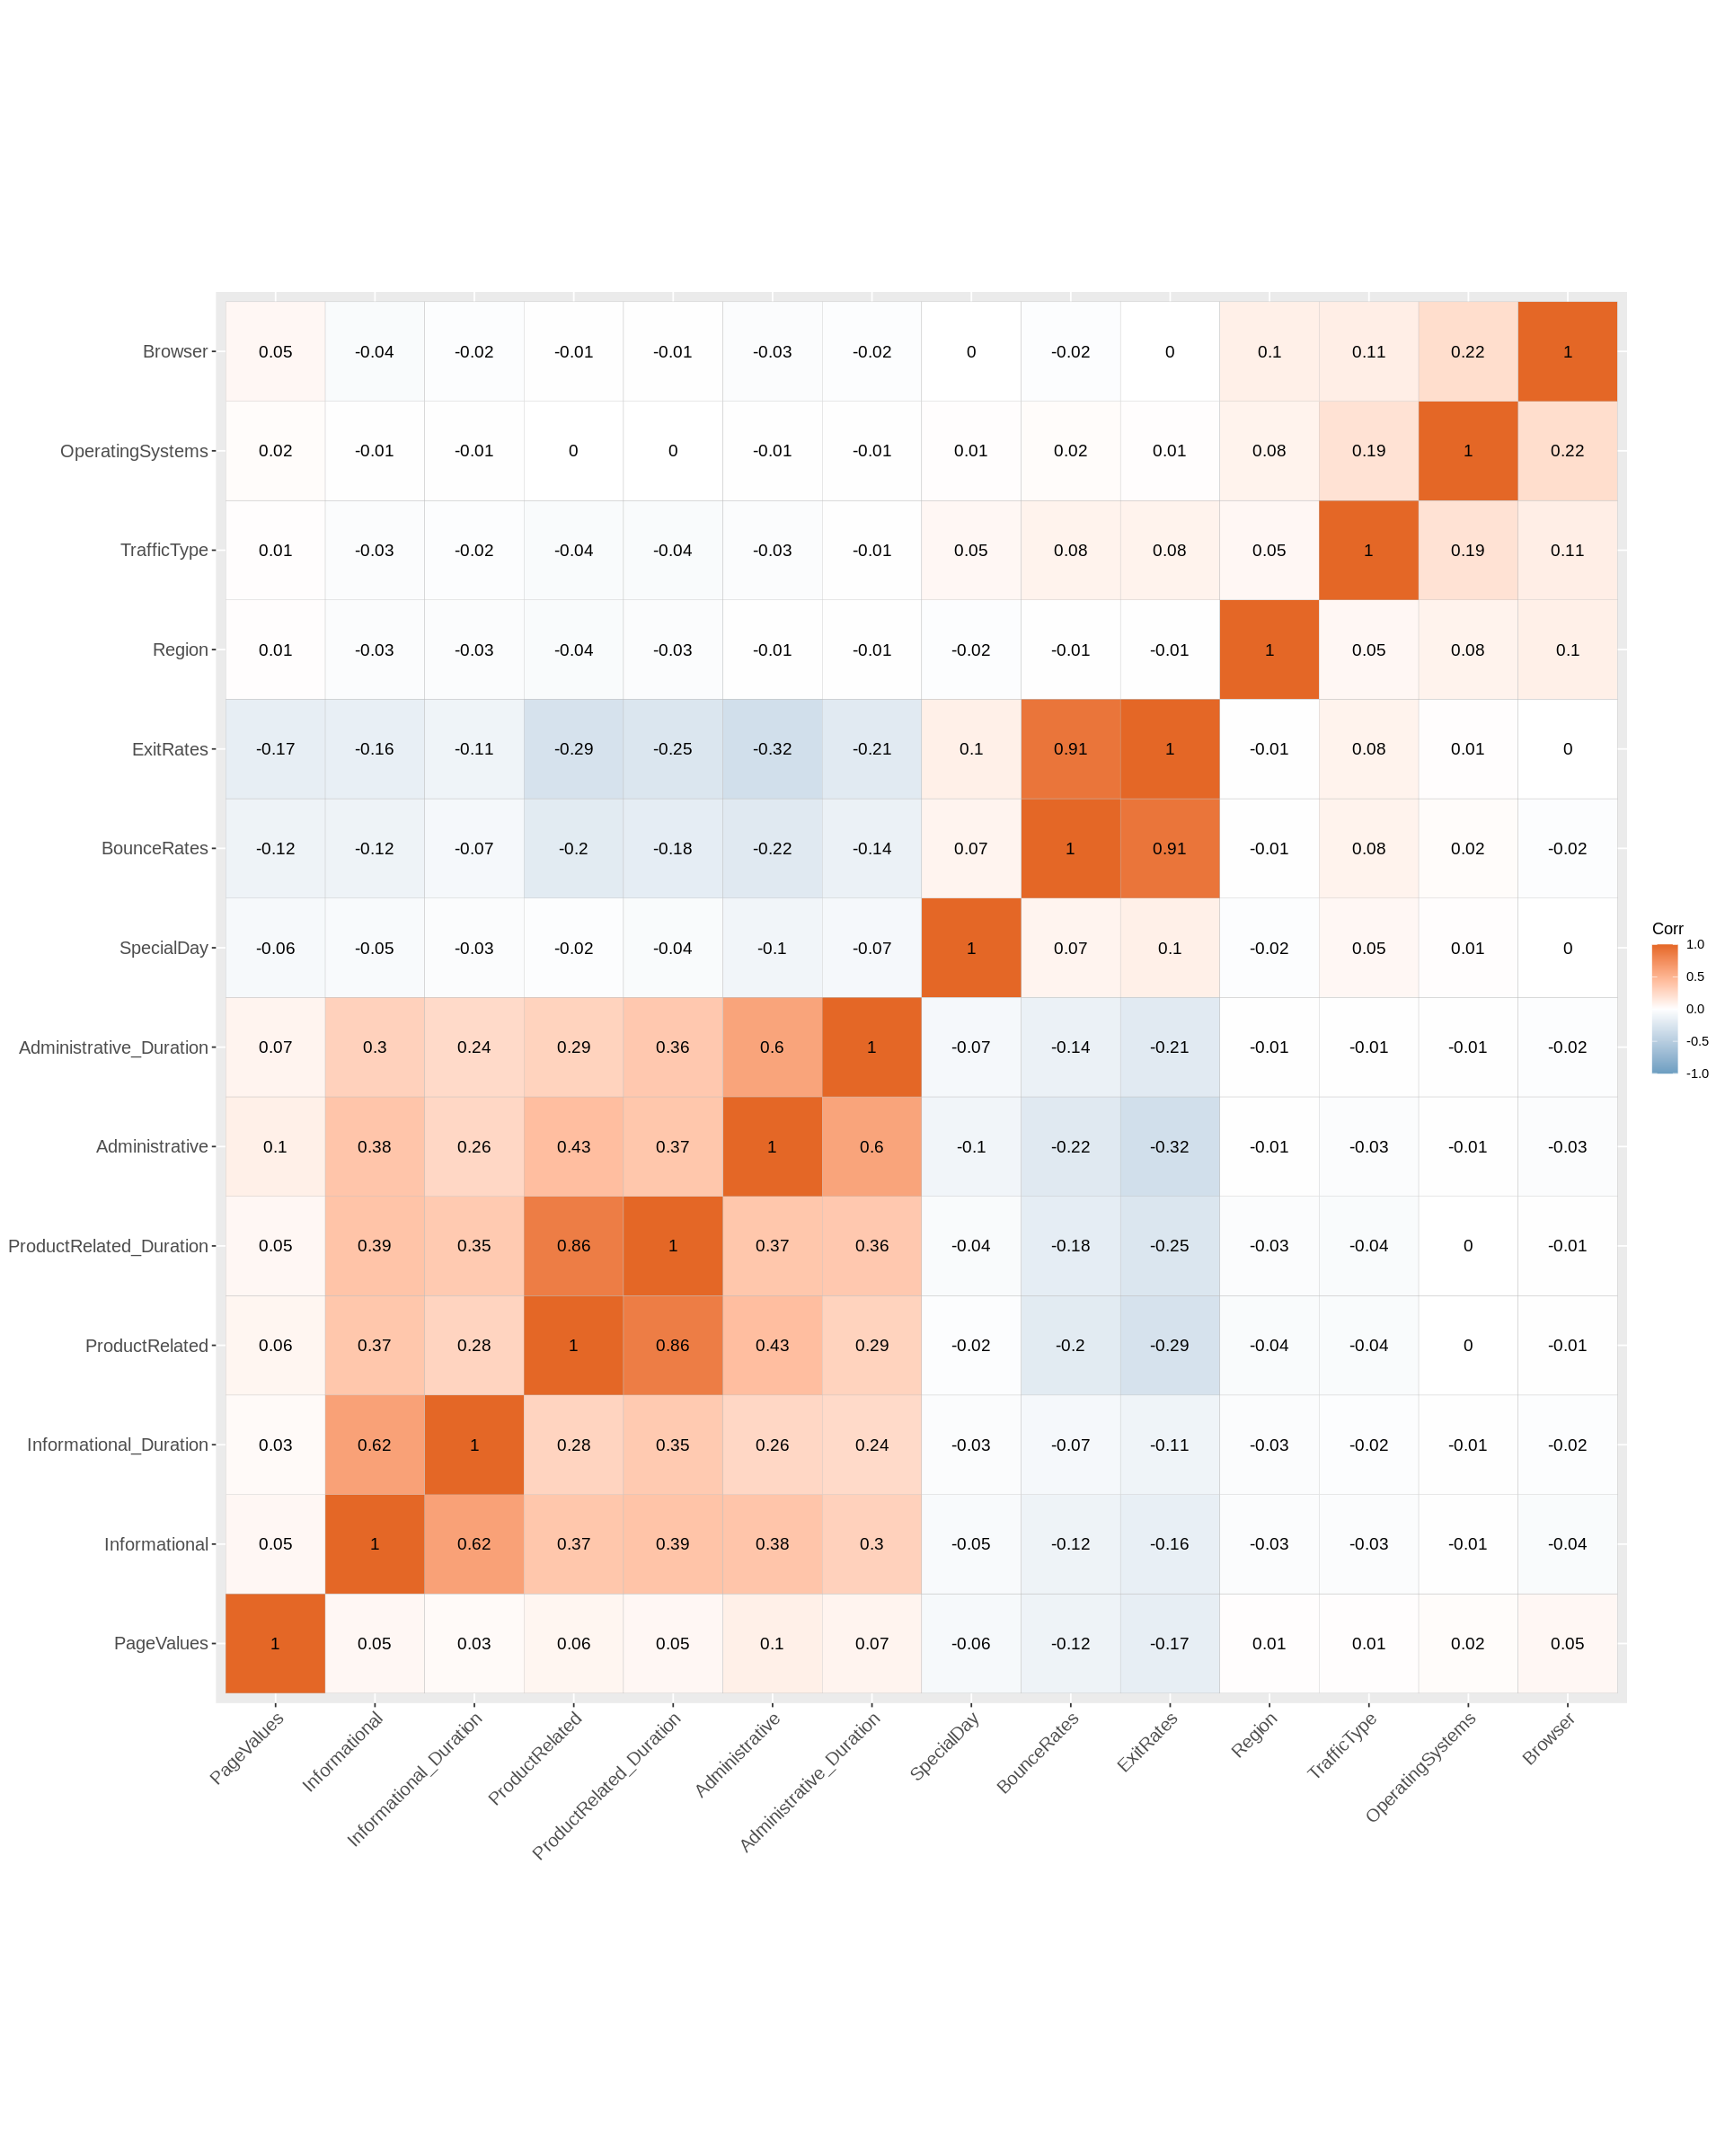

In [50]:
# Checking the correlation coefficients for numeric variables

install.packages("ggcorrplot")
library(ggcorrplot)
corr = round(cor(select_if(retail_num, is.numeric)), 2)
ggcorrplot(corr, hc.order = T, ggtheme = ggplot2::theme_gray,
   colors = c("#6D9EC1", "white", "#E46726"), lab = T)

- The only strong correlation is between product related vs product related duration, administrative vs administrative duration , informational vs informational duration and bounce rates vs exit rates.

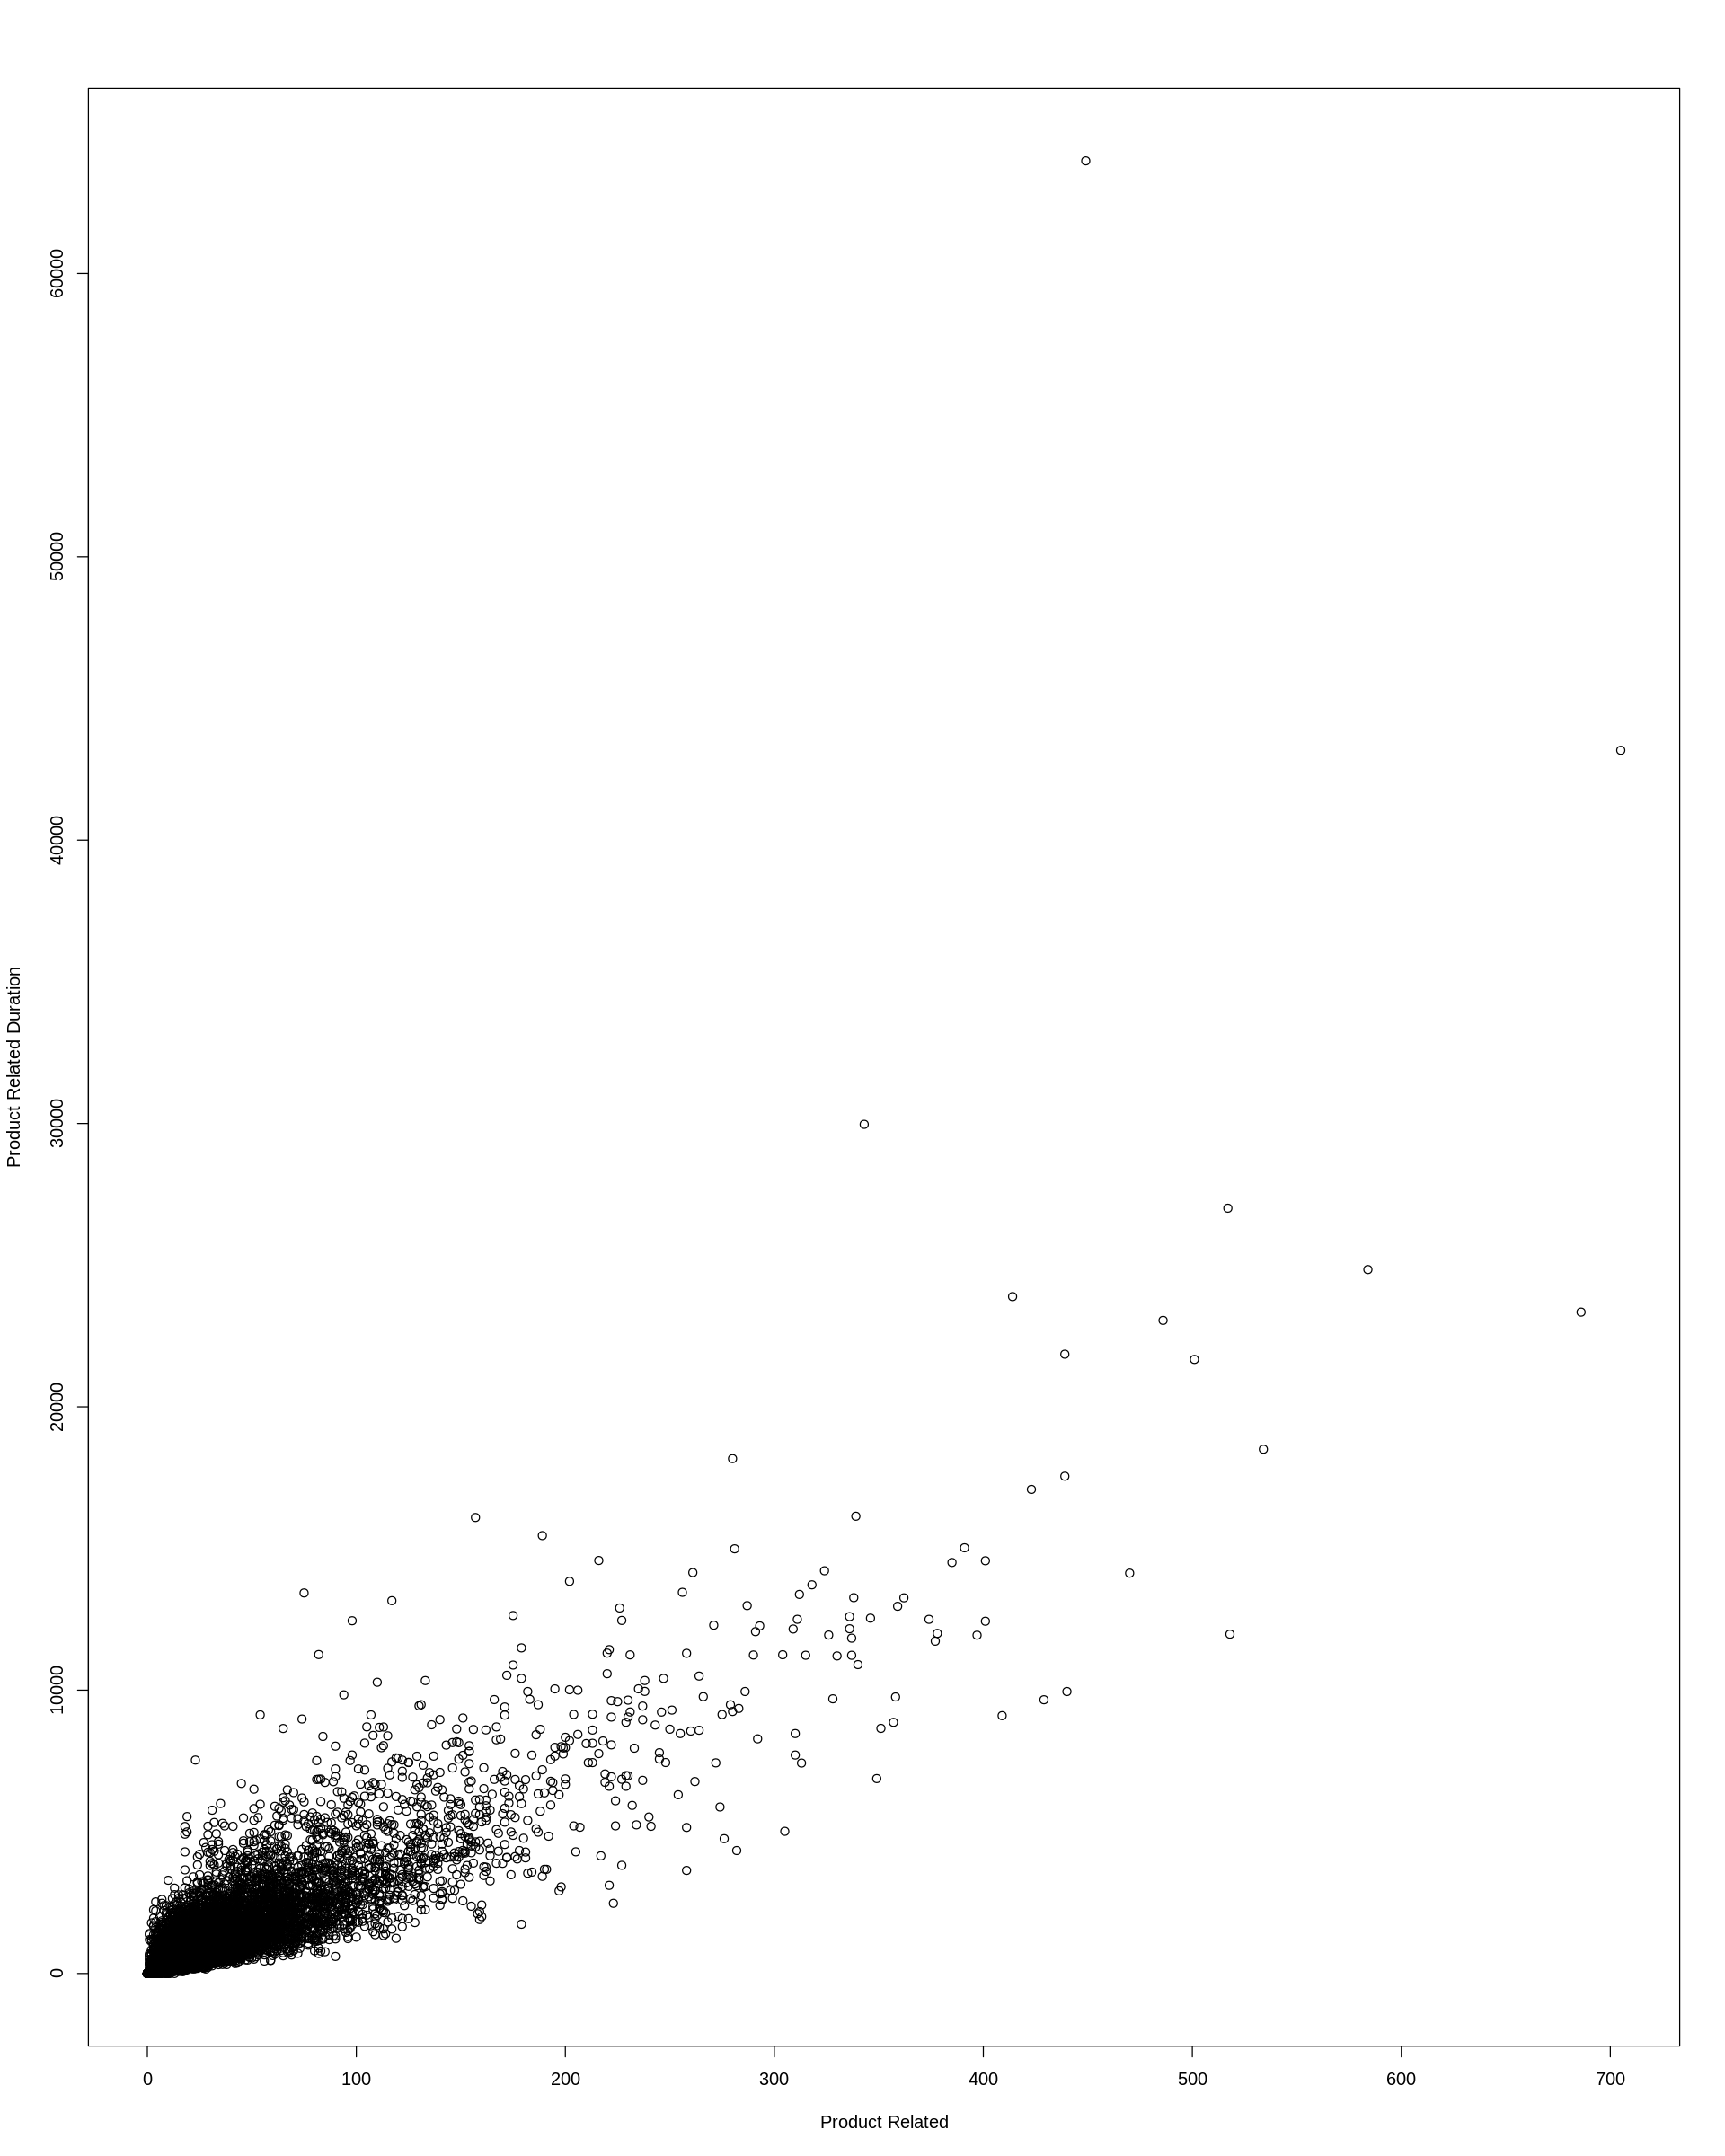

In [53]:
# Scatter plot to compare product related vs product related duration

plot(retail$ProductRelated, retail$ProductRelated_Duration, xlab="Product Related", ylab="Product Related Duration")

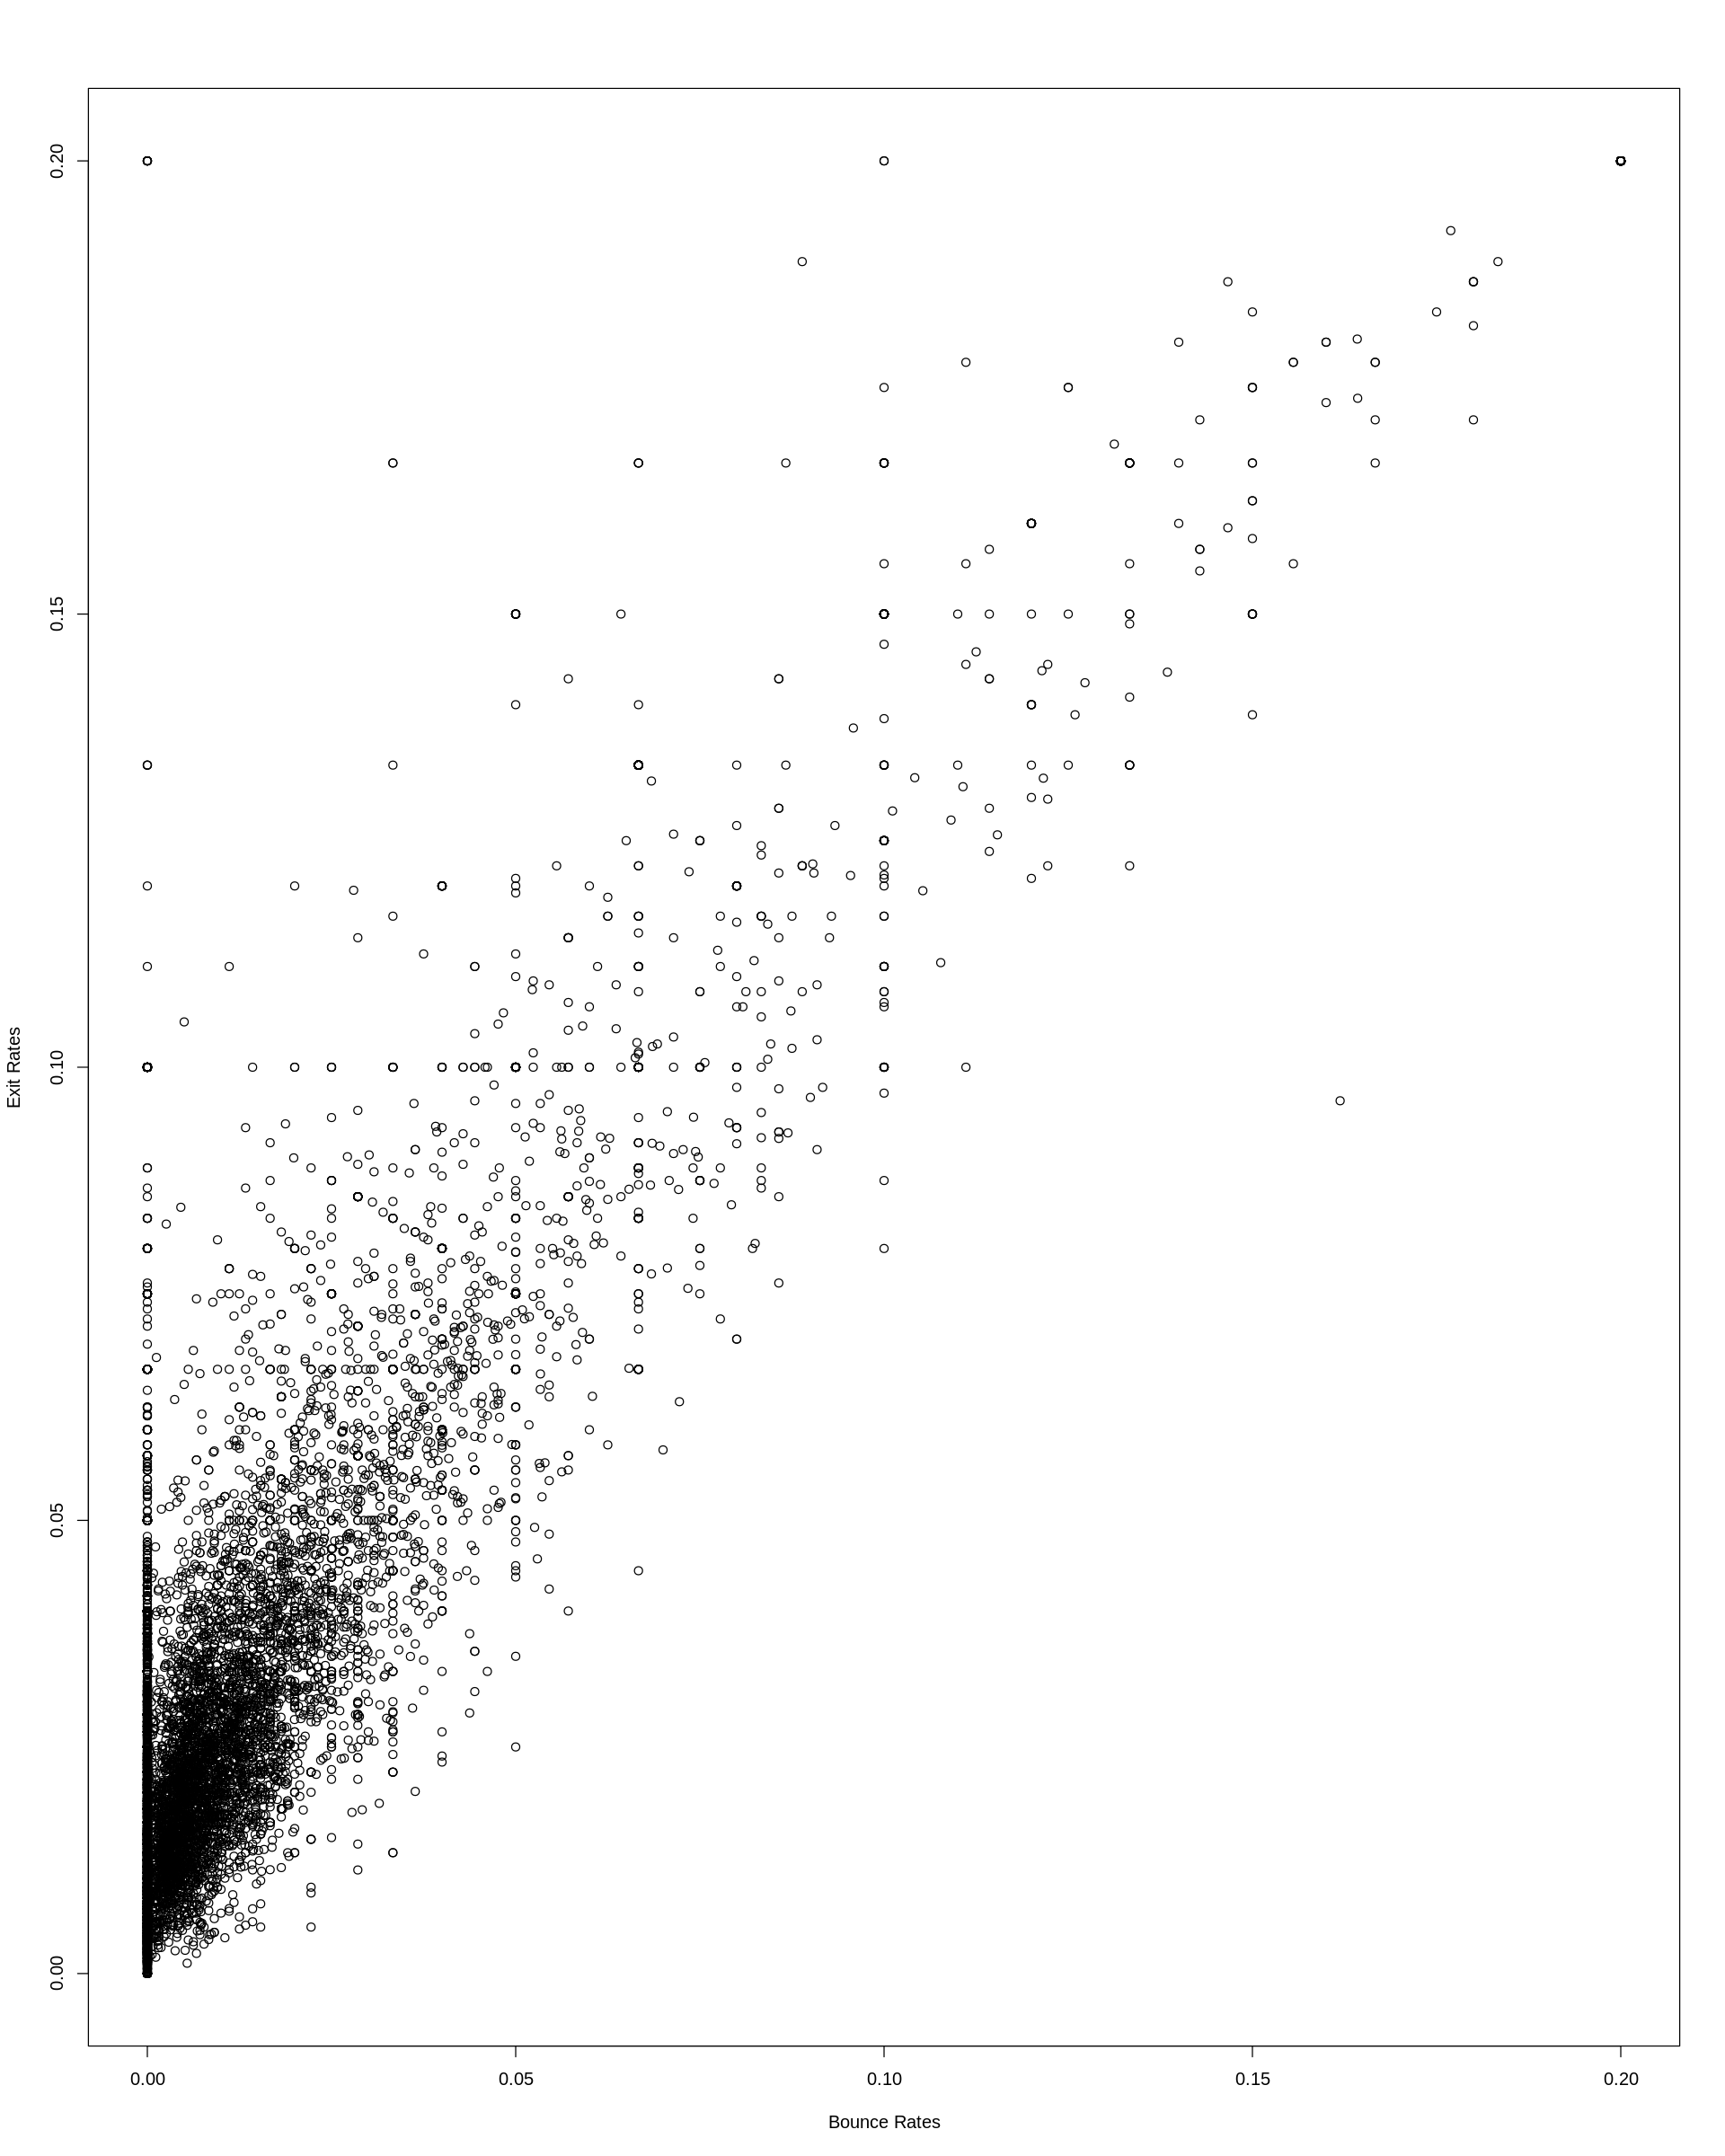

In [54]:
# Scatter plot to compare bounce rates and exit rates

plot(retail$BounceRates, retail$ExitRates, xlab="Bounce Rates", ylab="Exit Rates")

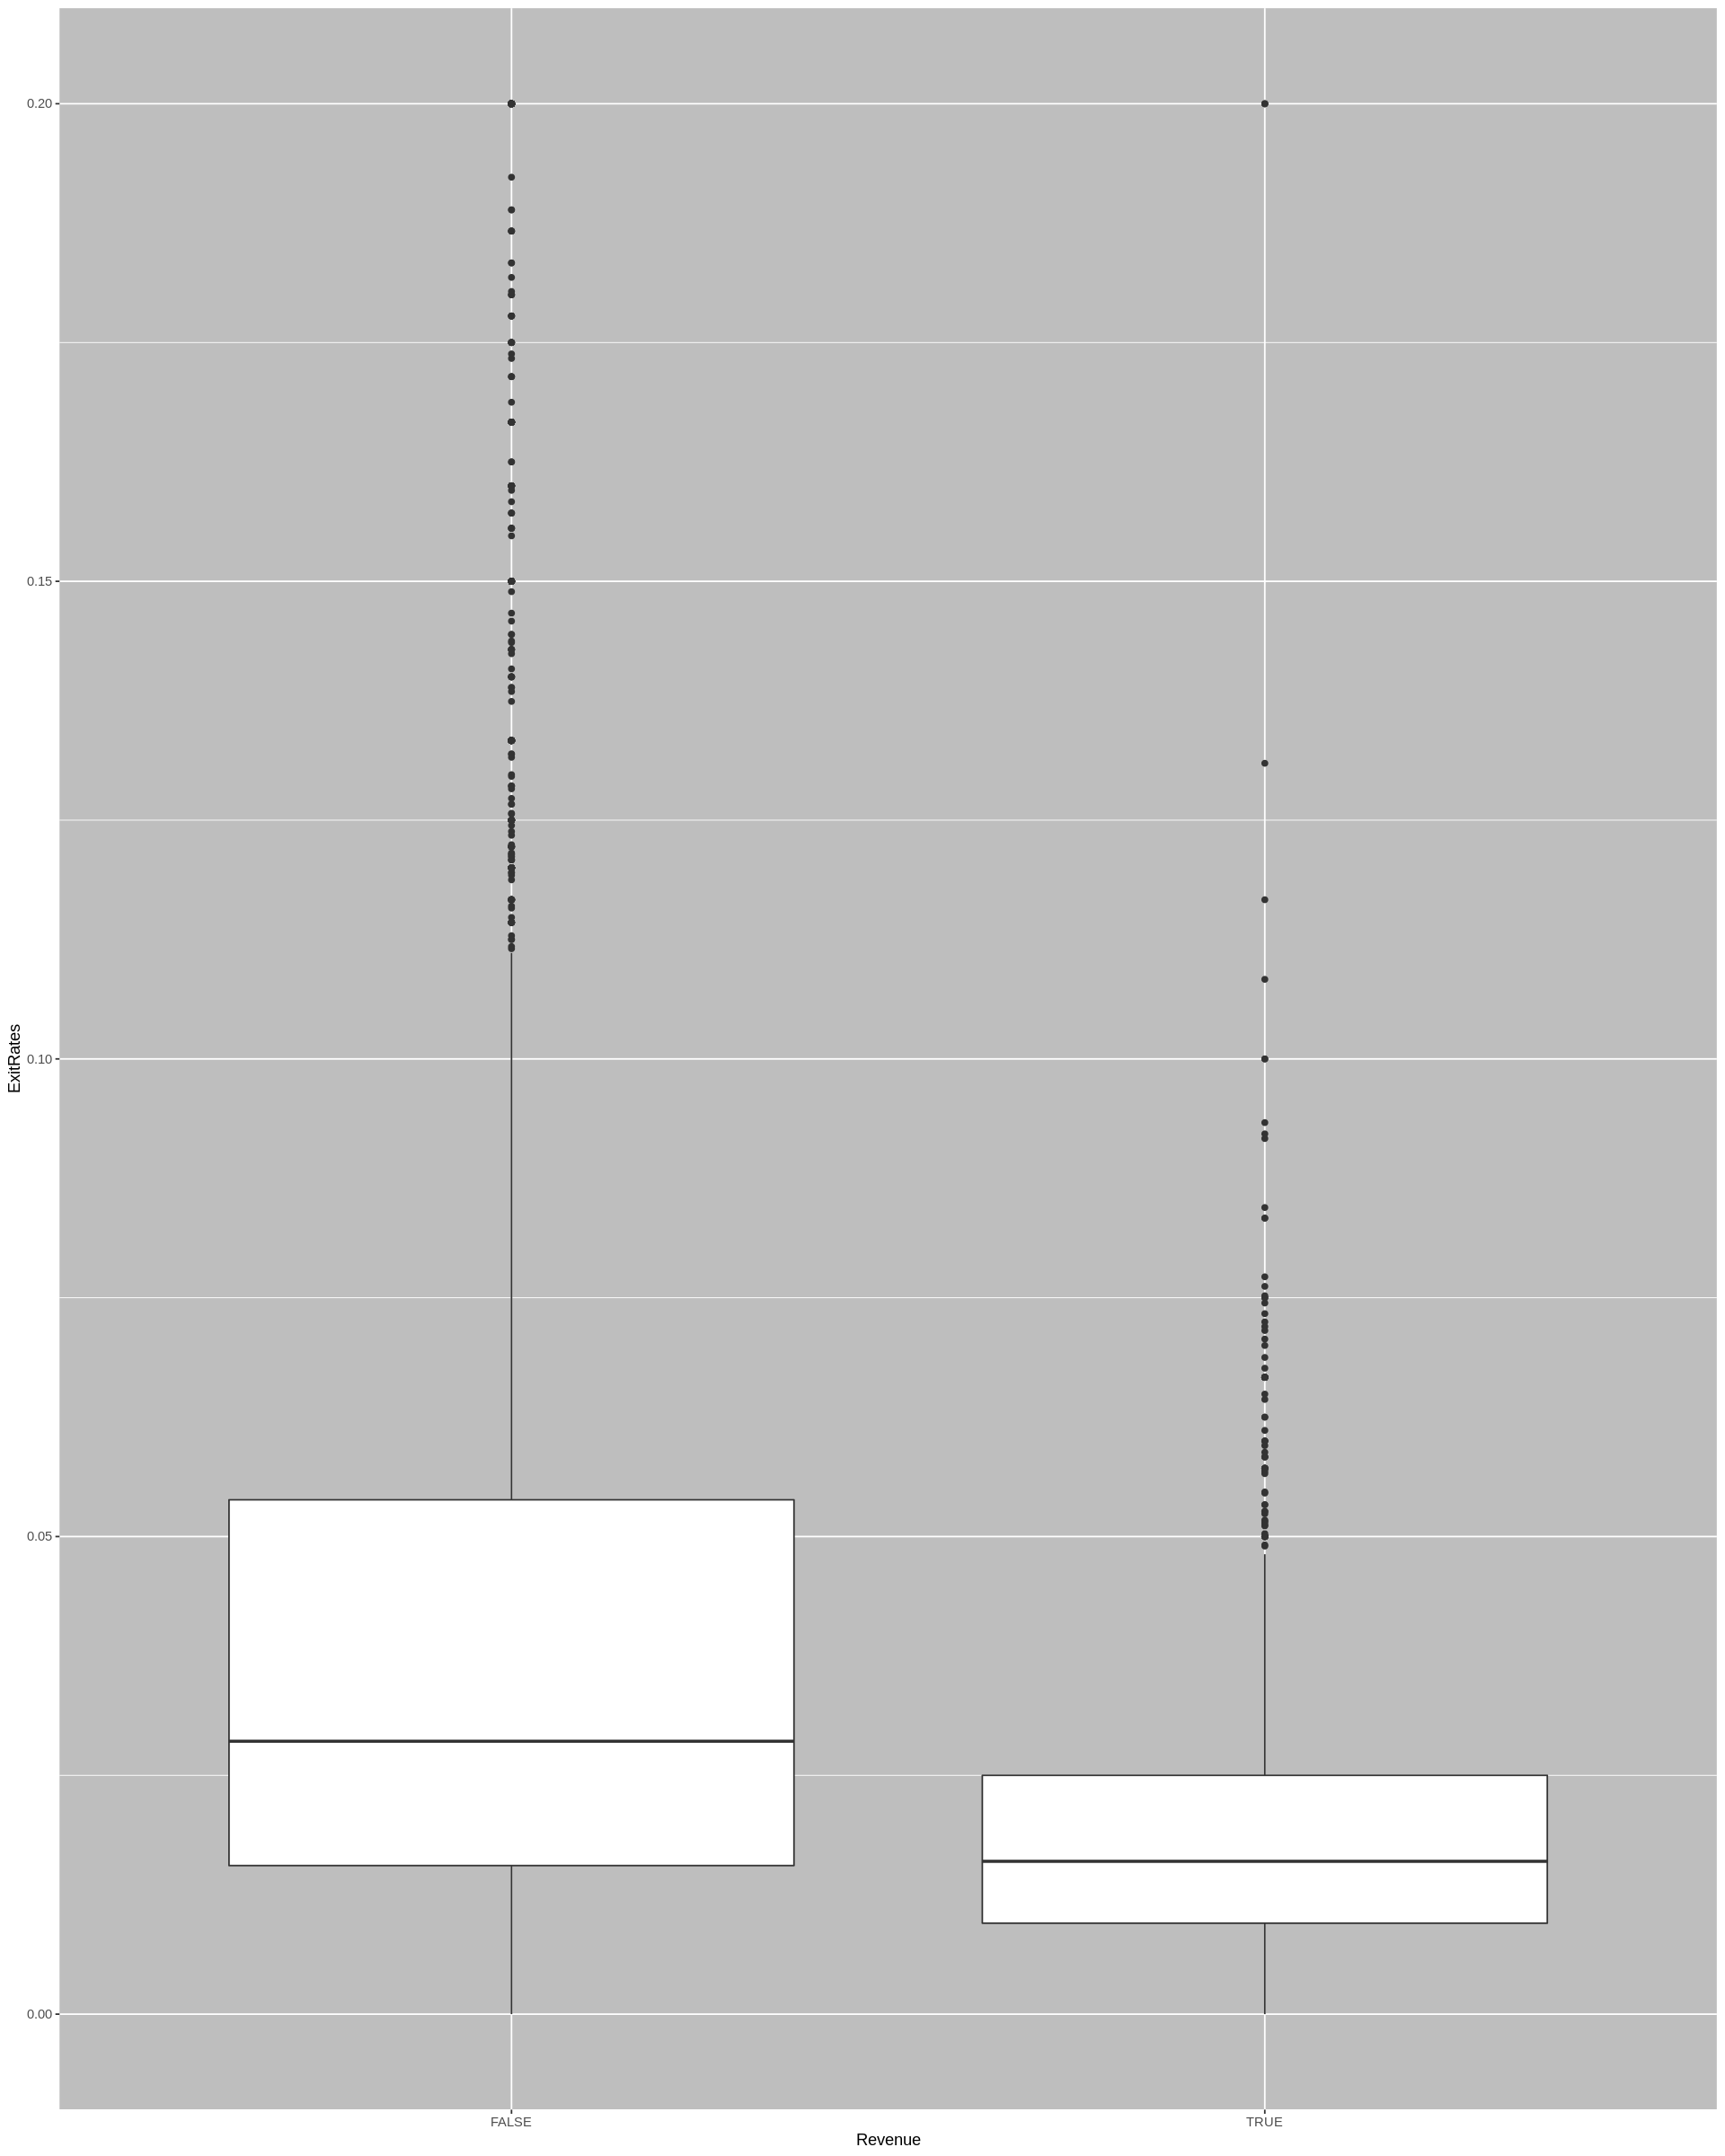

In [63]:
# Comparing exit rates by revenue category

ggplot(data = retail,aes(x = Revenue, y = ExitRates, group = Revenue)) +
  geom_boxplot() +
  theme(panel.background = element_rect(fill = "gray"))

- Most users who brought in revenue had relatively lower exit rates.

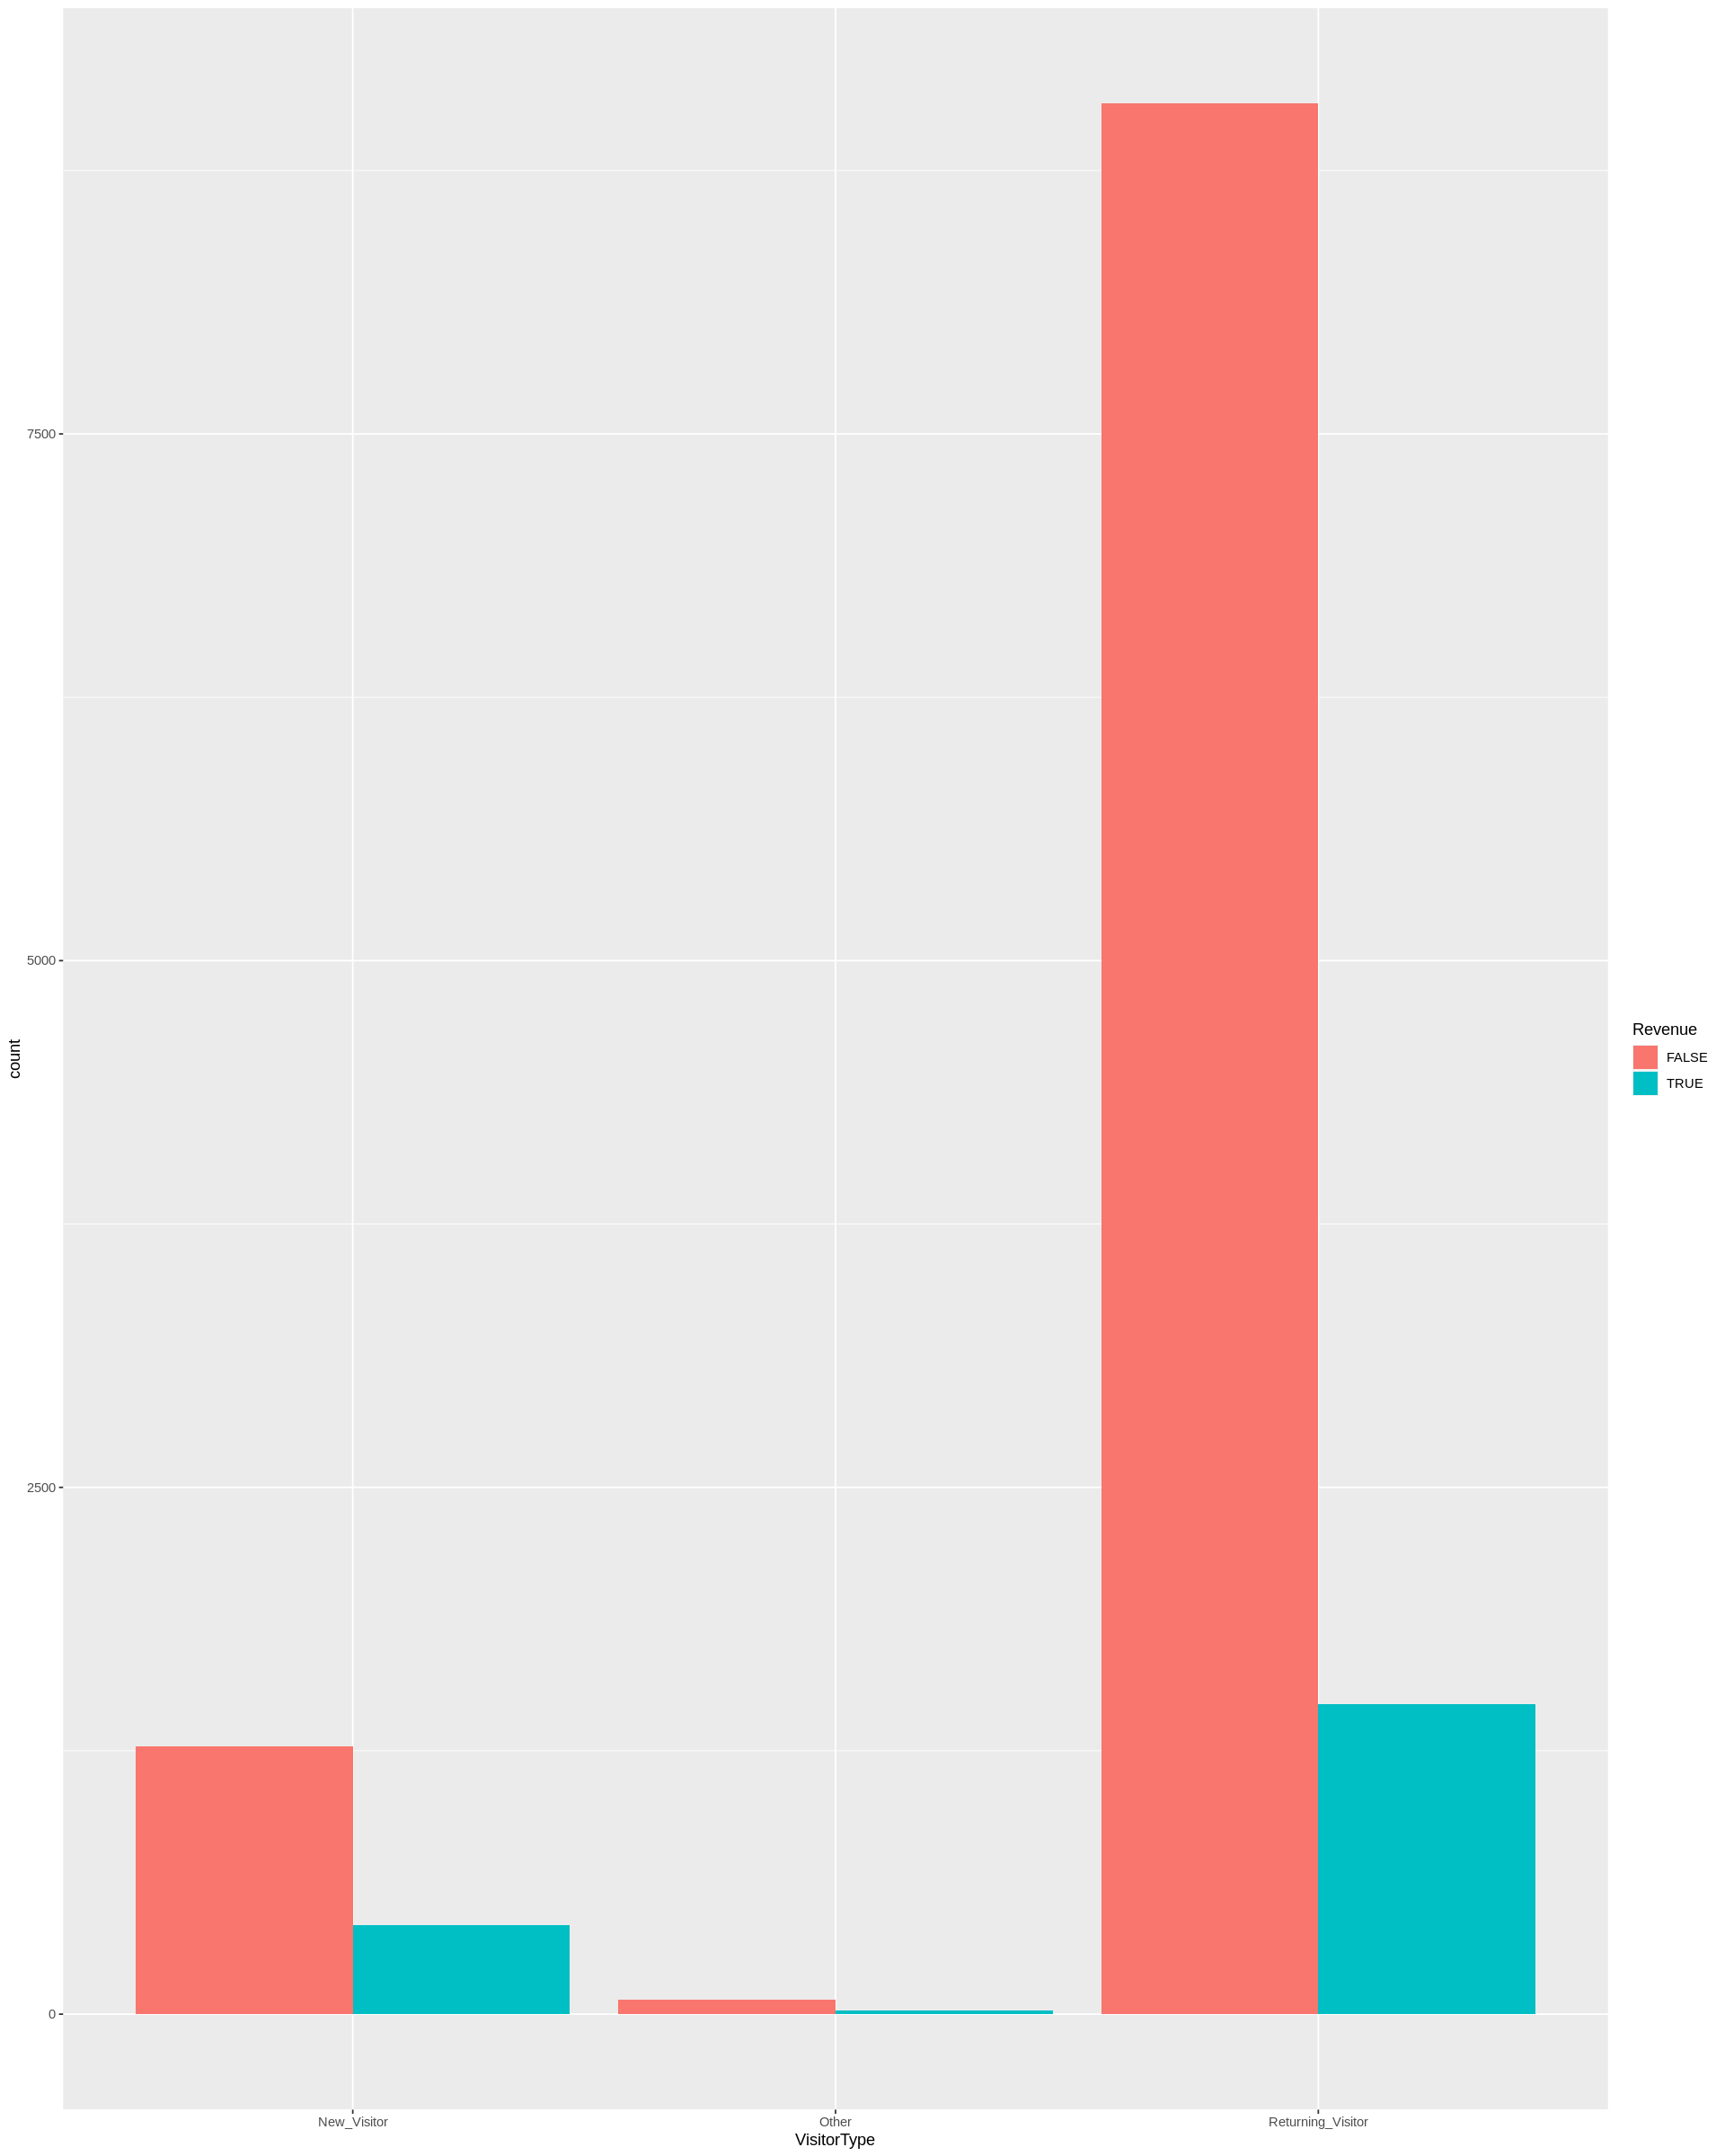

In [74]:
# Comparing revenue generation by visitor type

ggplot(data = retail) + 
  geom_bar(mapping = aes(x = VisitorType, fill = Revenue), position = "dodge")

- Most customers are returning clients. There's a disproportionately large number of returning customers who do not bring in sales revenue compared to new customers.

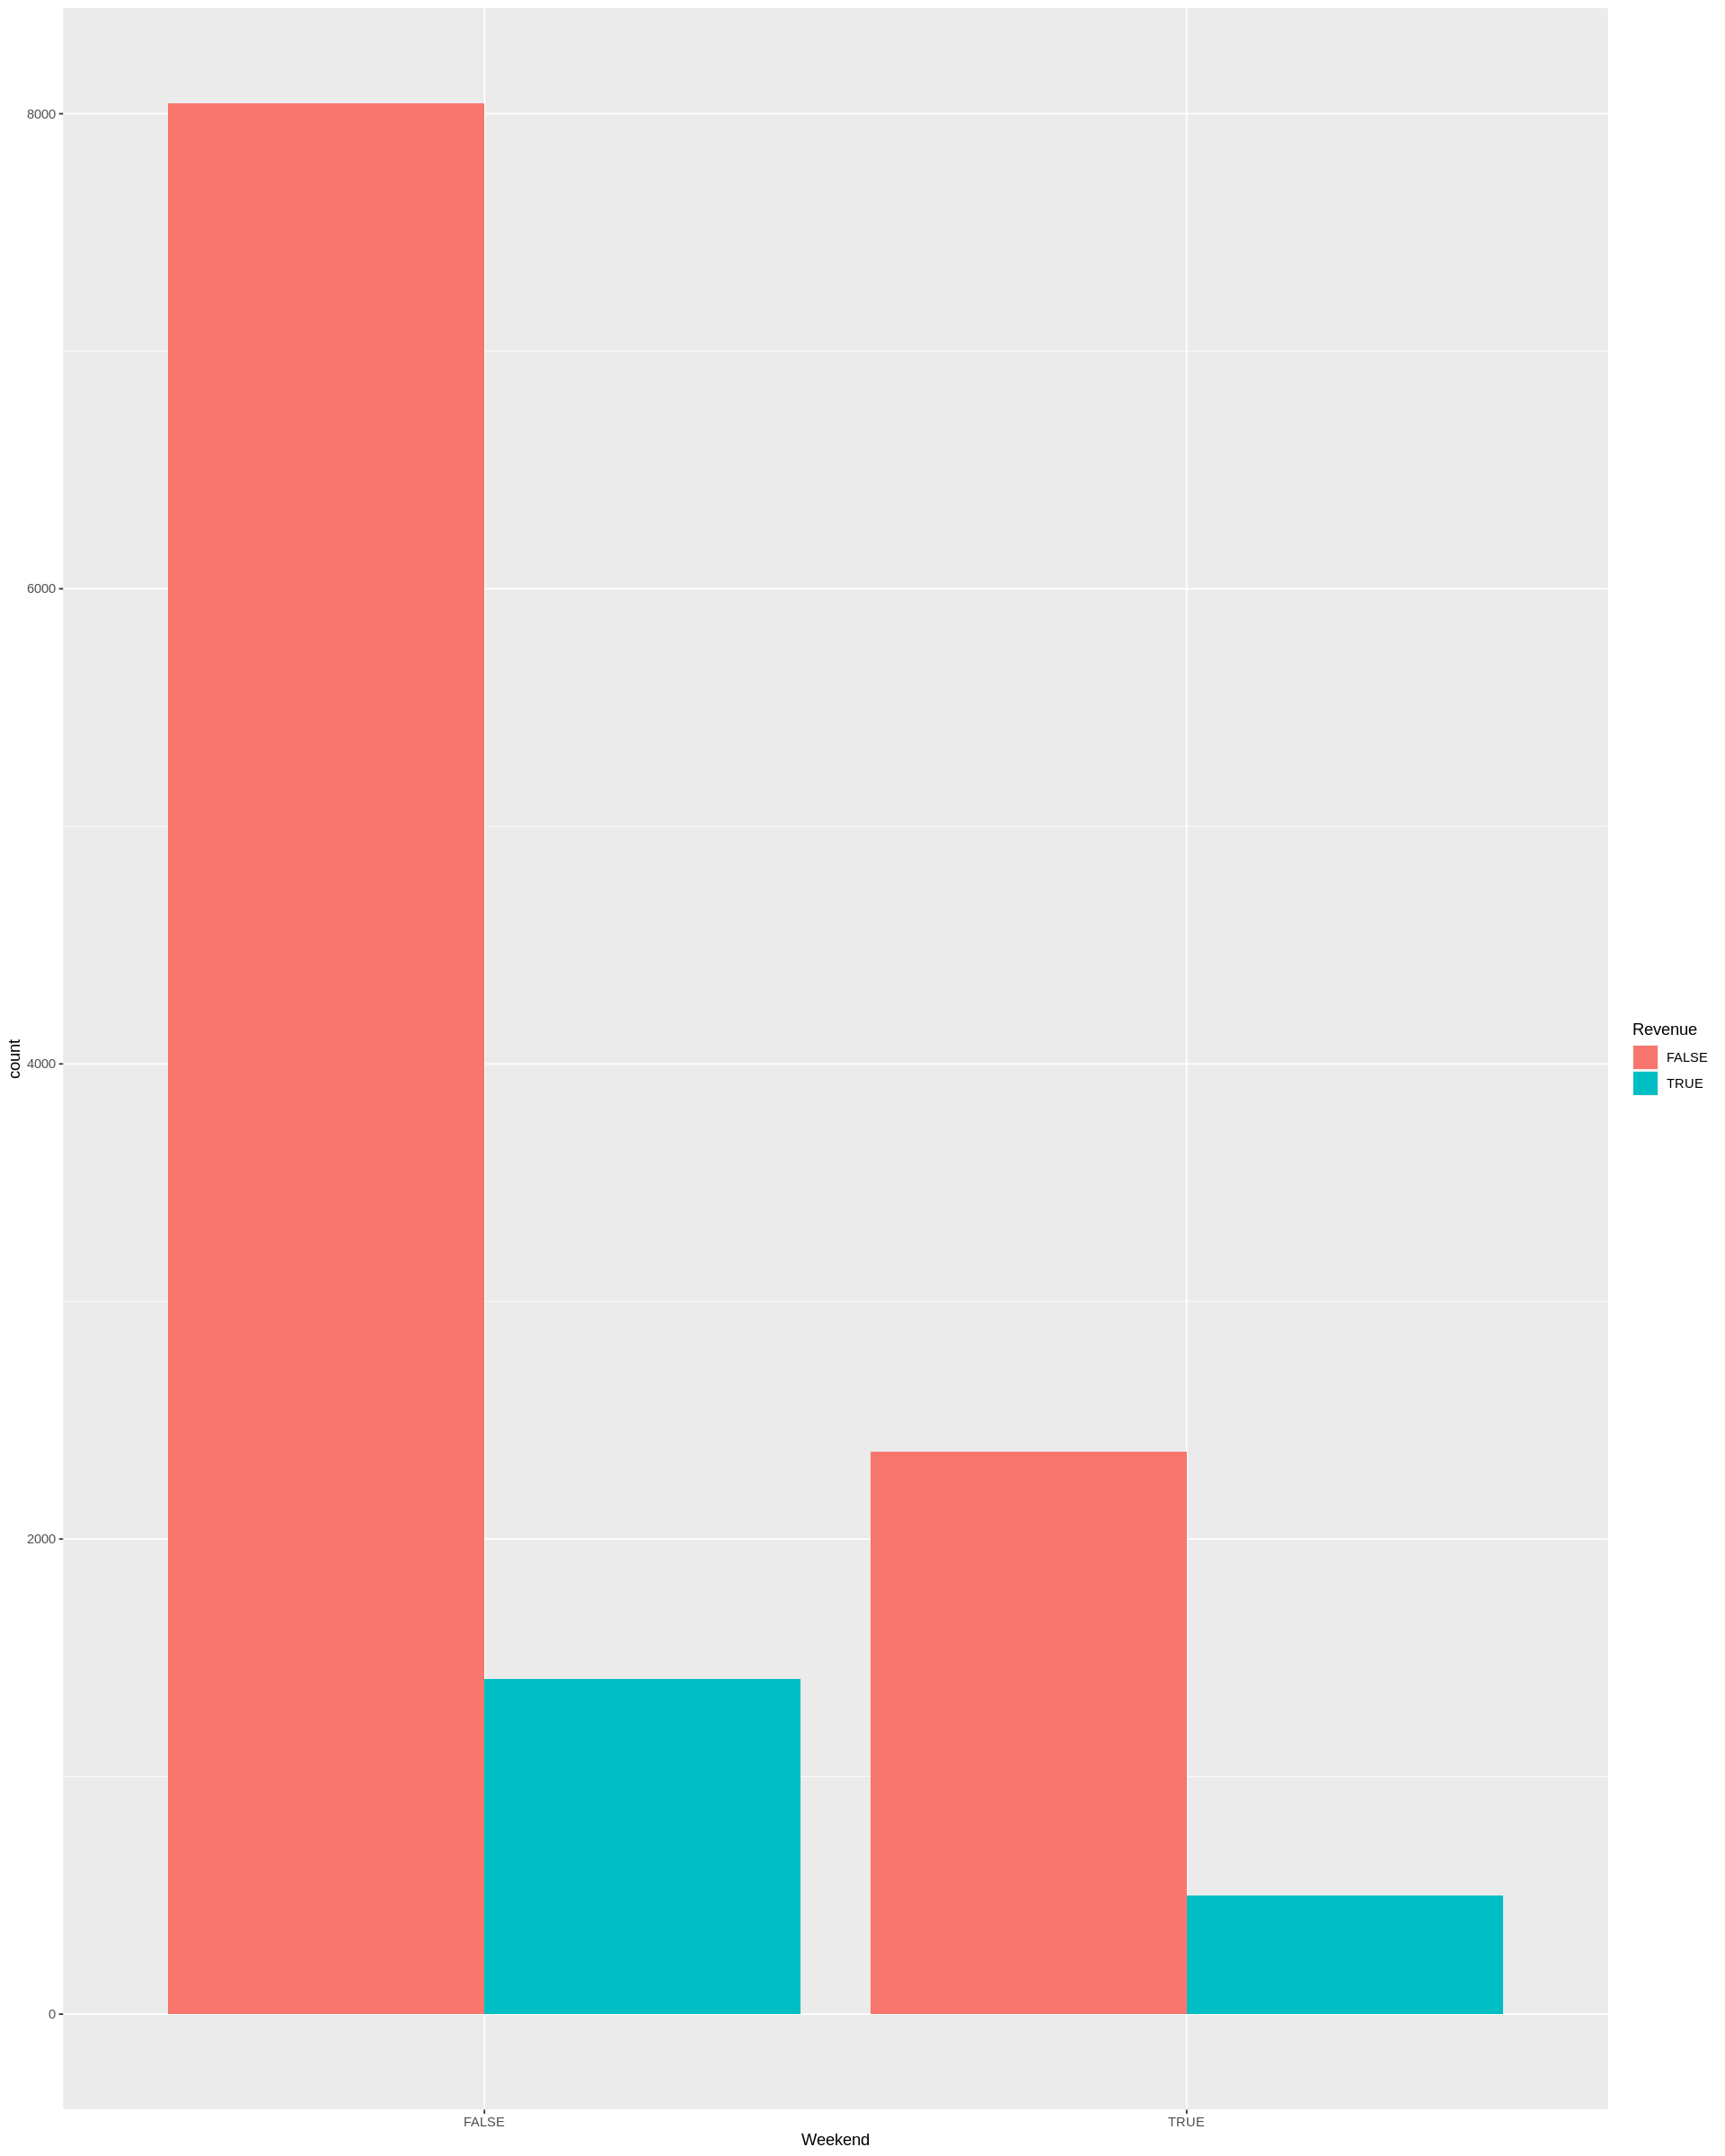

In [67]:
# Comparing revenue generation by weekday type

ggplot(data = retail) + 
  geom_bar(mapping = aes(x = Weekend, fill = Revenue), position = "dodge")

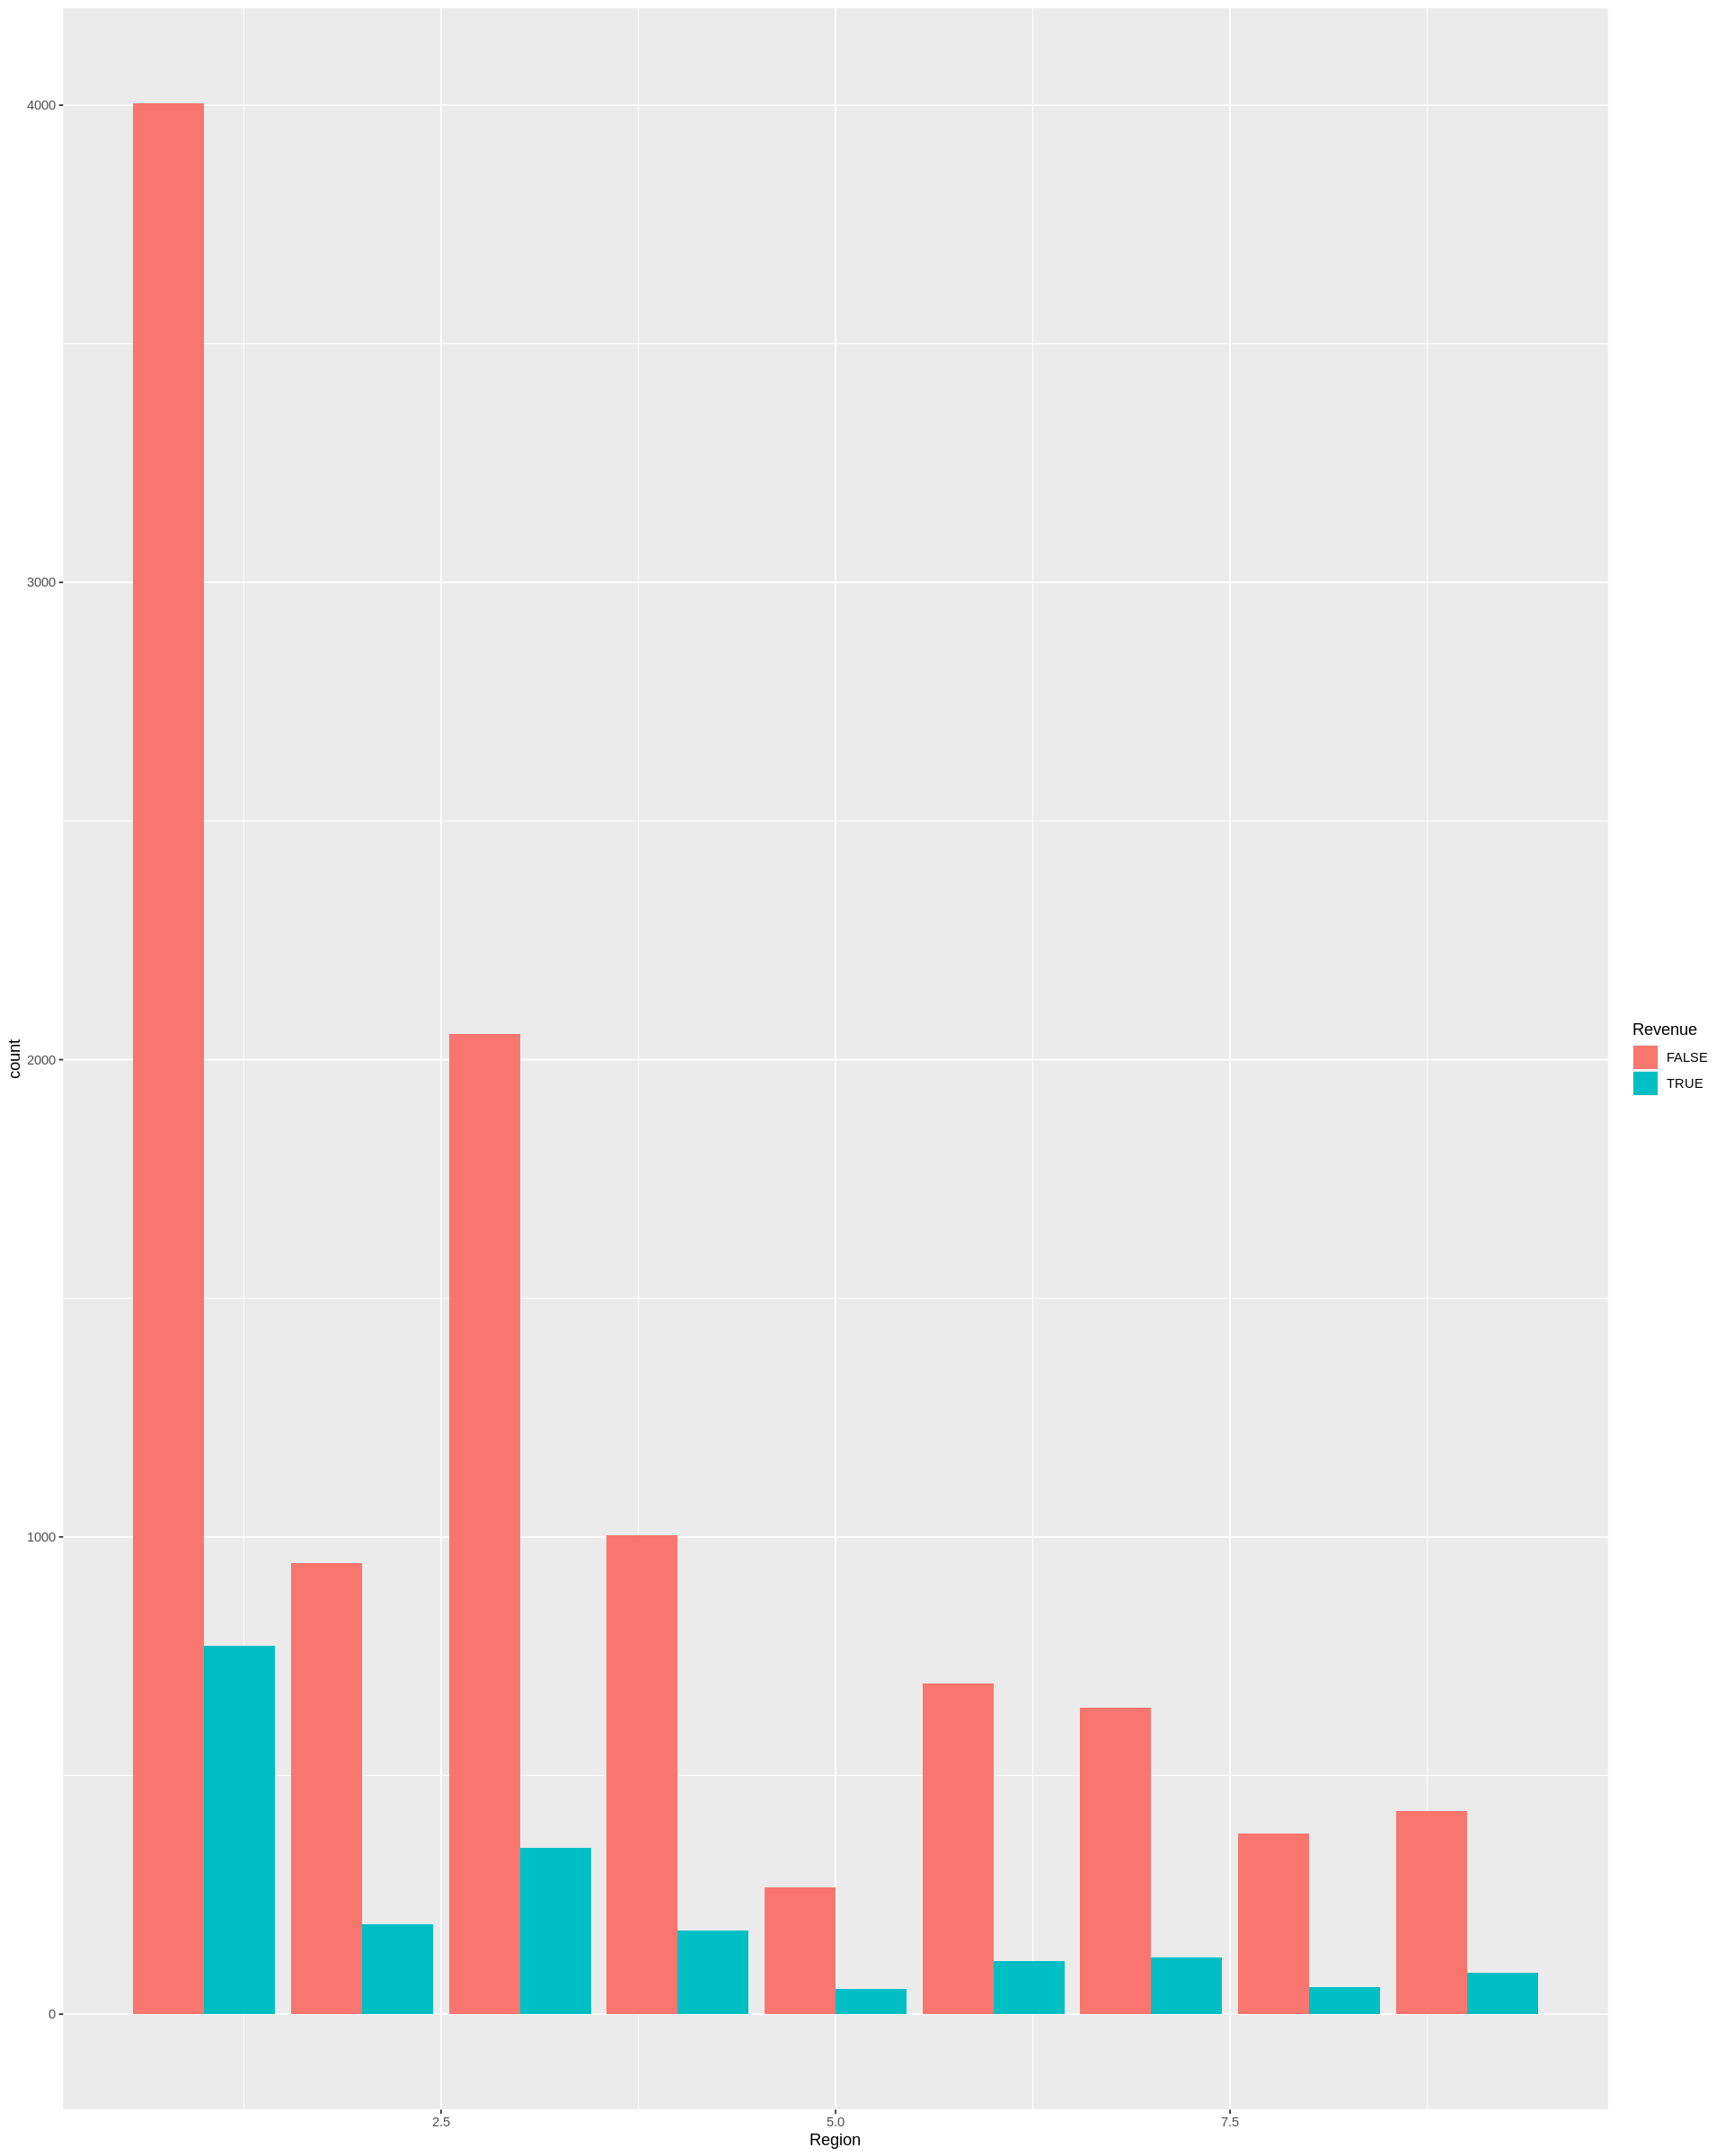

In [68]:
# Comparing revenue generation by region

ggplot(data = retail) + 
  geom_bar(mapping = aes(x = Region, fill = Revenue), position = "dodge")

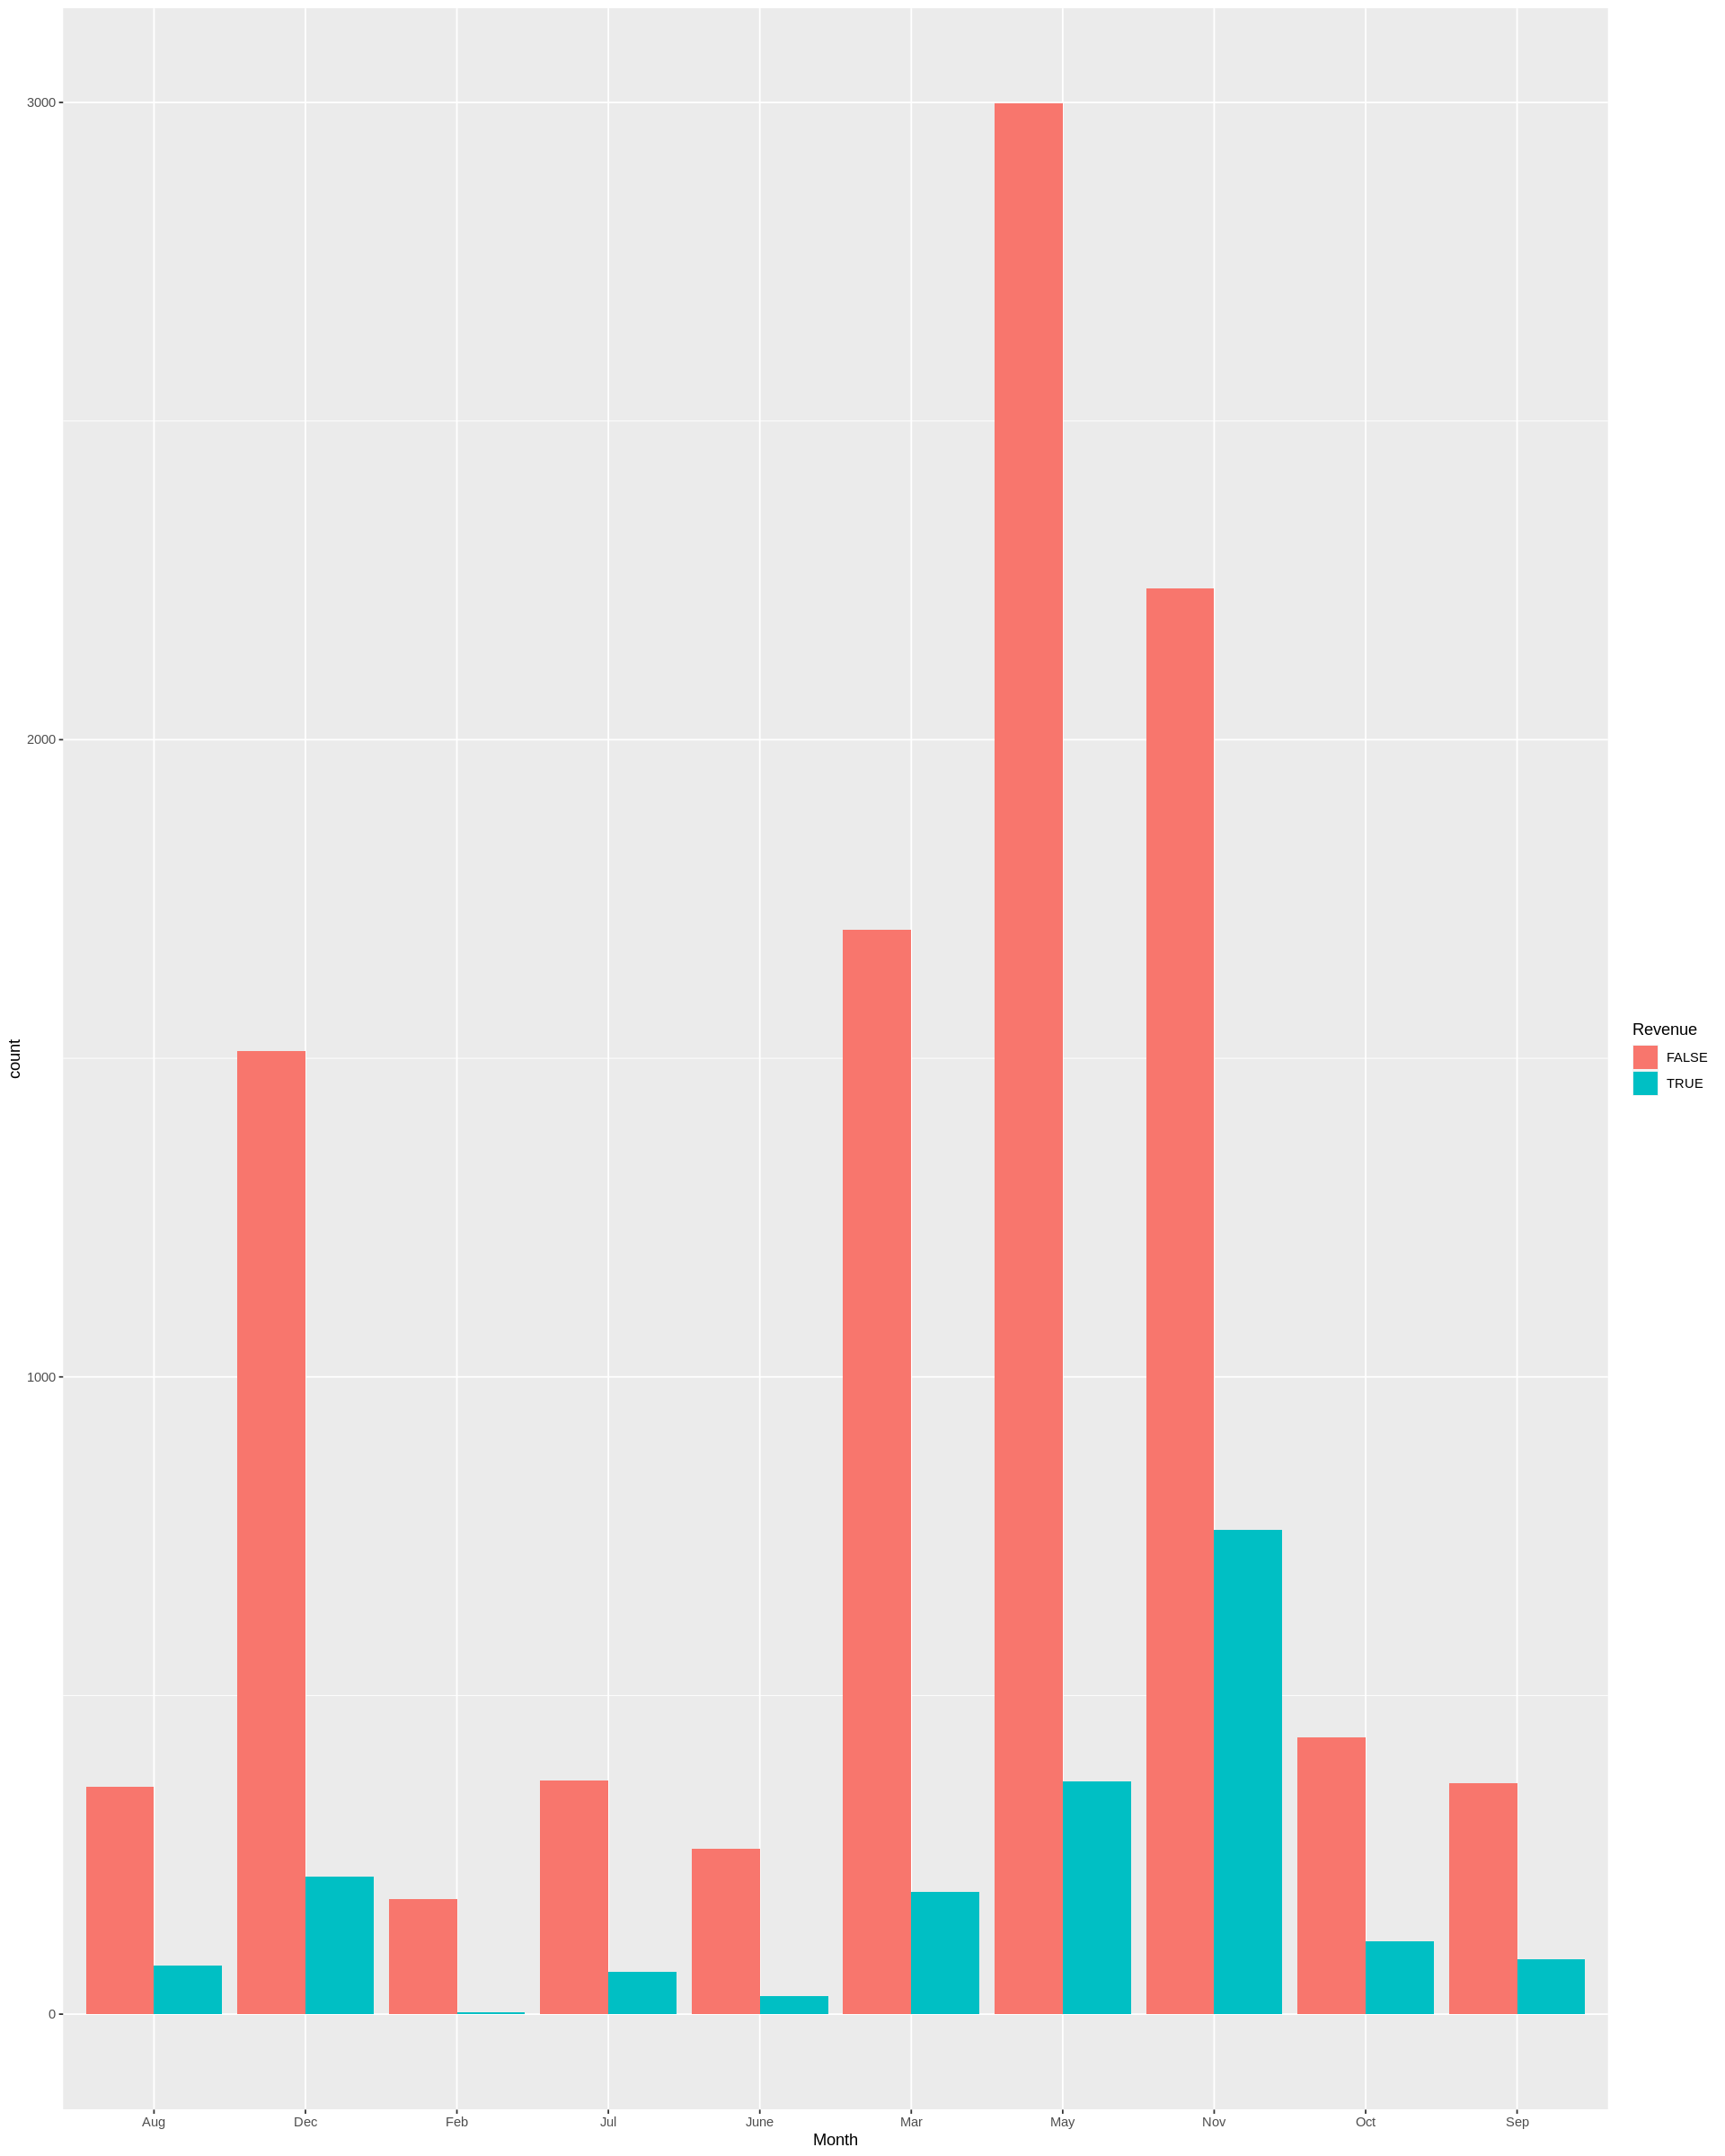

In [69]:
# Comparing revenue generation by month
ggplot(data = retail) + 
  geom_bar(mapping = aes(x = Month, fill = Revenue), position = "dodge")

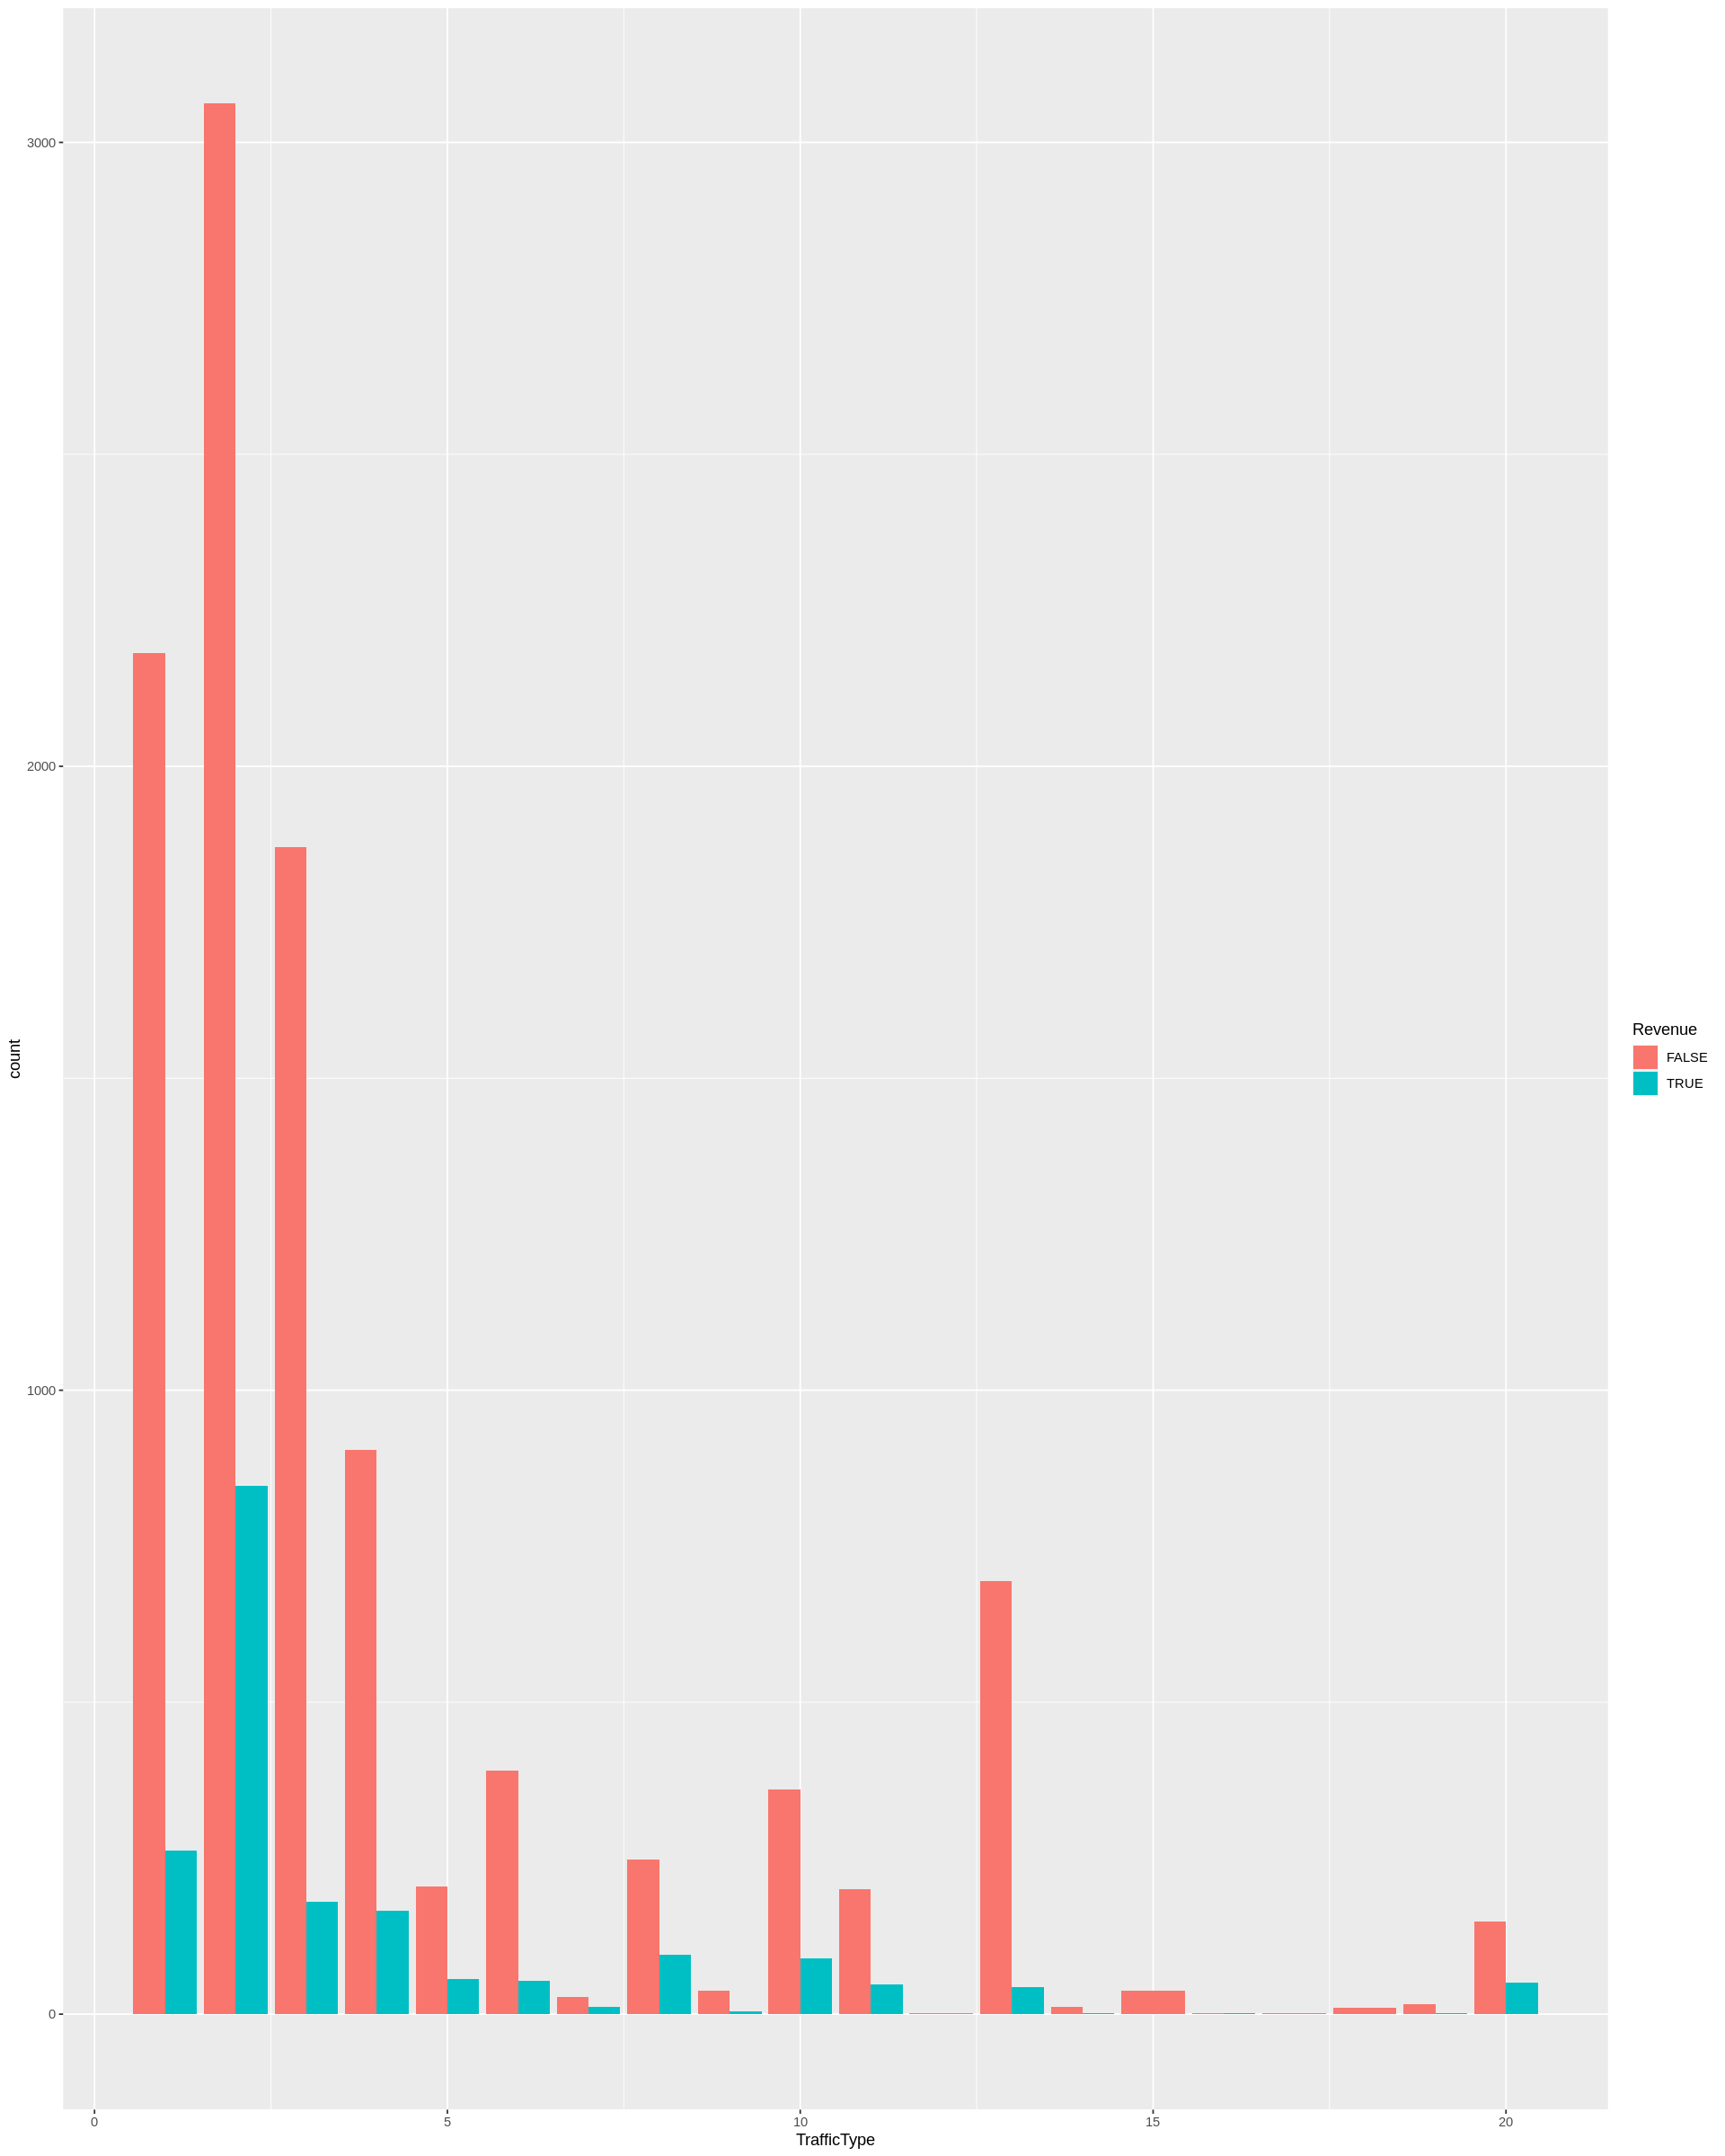

In [71]:
# Comparing revenue generation by traffic type

ggplot(data = retail) + 
  geom_bar(mapping = aes(x = TrafficType, fill = Revenue), position = "dodge")

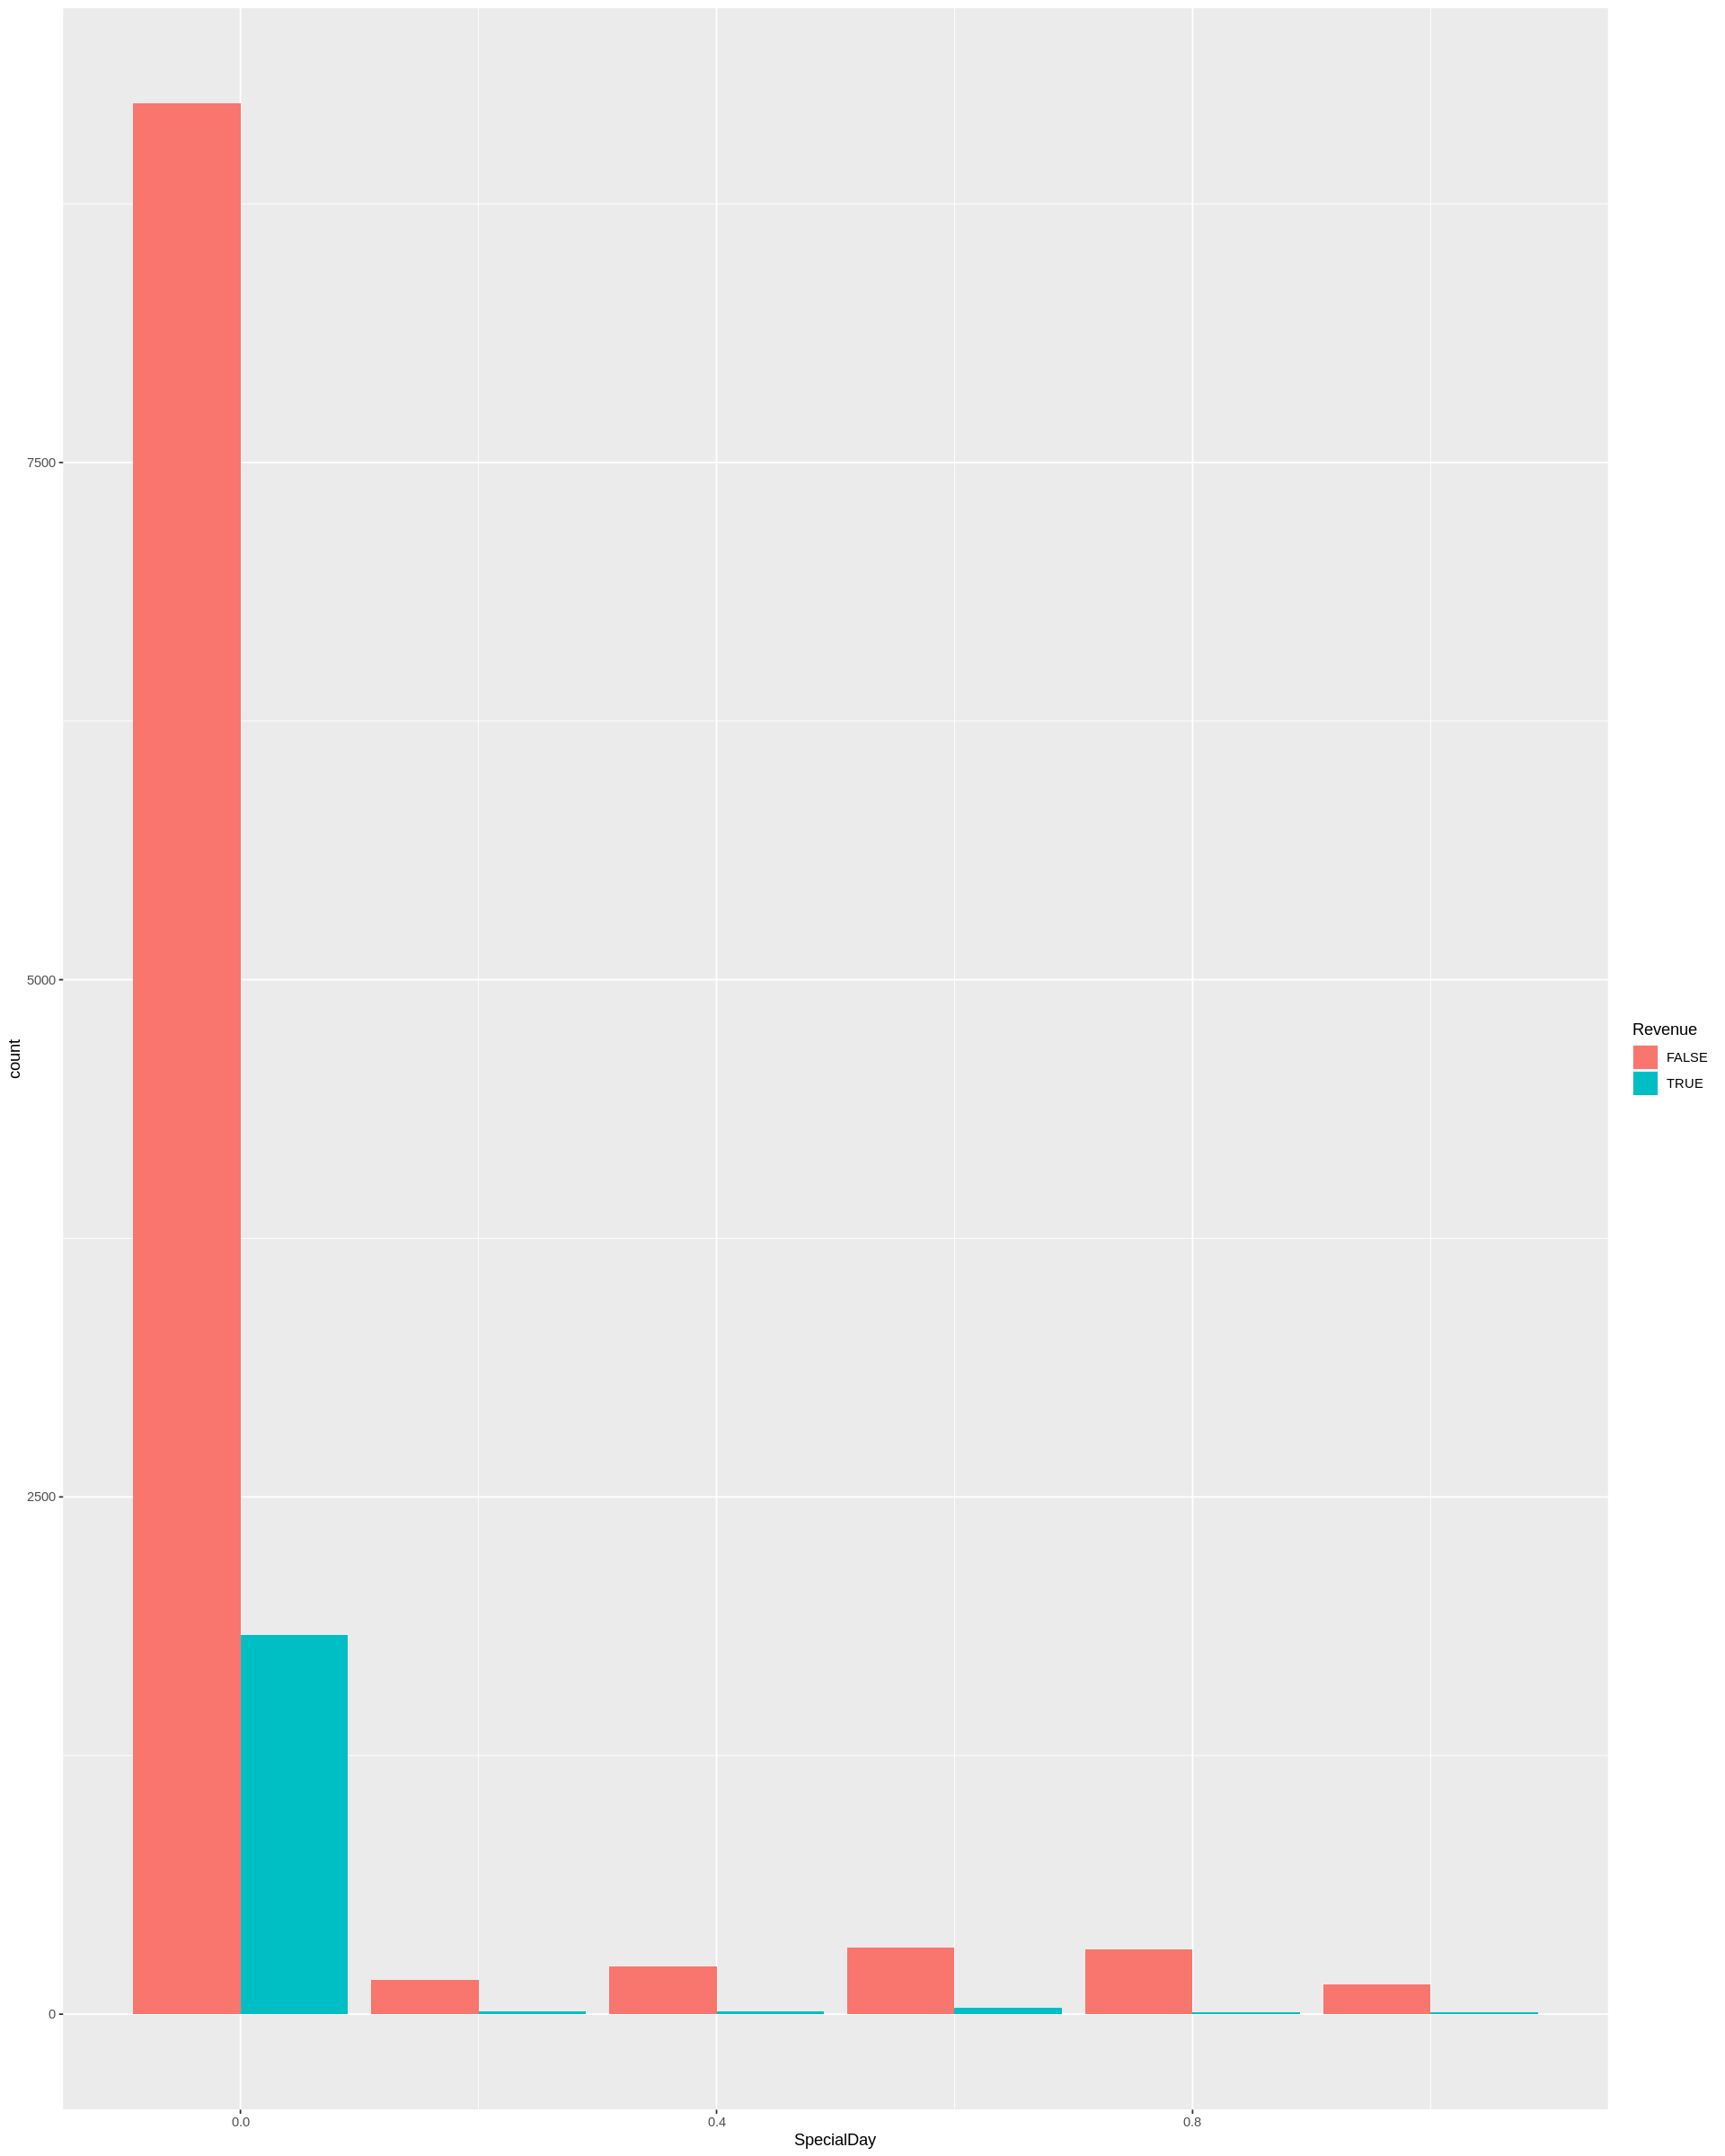

In [72]:
# Comparing revenue generation by special day status

ggplot(data = retail) + 
  geom_bar(mapping = aes(x = SpecialDay, fill = Revenue), position = "dodge")

## Multivariate Analysis

In [75]:
# Converting categorical attributes to numeric data type

retail$Month <- as.integer(as.factor(retail$Month))
retail$VisitorType <- as.integer(as.factor(retail$VisitorType))
retail$Weekend <- as.integer(as.factor(retail$Weekend))

In [85]:
# Applying PCA  to dataset

retail.pca <- prcomp(retail[,c(1:18)], center = TRUE, scale. = TRUE)
summary(retail.pca)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.869 1.3660 1.19252 1.14352 1.08565 1.02867 1.01008
Proportion of Variance 0.194 0.1037 0.07901 0.07265 0.06548 0.05879 0.05668
Cumulative Proportion  0.194 0.2977 0.37670 0.44934 0.51482 0.57361 0.63029
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.98444 0.97267 0.93584 0.91665 0.89892 0.86626 0.70311
Proportion of Variance 0.05384 0.05256 0.04866 0.04668 0.04489 0.04169 0.02746
Cumulative Proportion  0.68413 0.73669 0.78535 0.83203 0.87692 0.91861 0.94607
                          PC15    PC16    PC17    PC18
Standard deviation     0.64890 0.59280 0.35045 0.27455
Proportion of Variance 0.02339 0.01952 0.00682 0.00419
Cumulative Proportion  0.96947 0.98899 0.99581 1.00000

- With only 9 components, the variance explained is ~74%. 

# Implementing the Solution

## K-Means Clustering

In [87]:
# Converting the target variable to numeric data type

retail$Revenue <- as.integer(as.factor(retail$Revenue))

In [90]:
# Normalizing all the features

normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))}

retail$Administrative <- normalize(retail$Administrative)
retail$Administrative_Duration <- normalize(retail$Administrative_Duration)
retail$Informational <- normalize(retail$Informational)
retail$Informational_Duration <- normalize(retail$Informational_Duration)
retail$ProductRelated <- normalize(retail$ProductRelated)
retail$ProductRelated_Duration <- normalize(retail$ProductRelated_Duration)
retail$BounceRates <- normalize(retail$BounceRates)
retail$ExitRates <- normalize(retail$ExitRates)
retail$PageValues <- normalize(retail$PageValues)
retail$SpecialDay <- normalize(retail$SpecialDay)
retail$OperatingSystems <- normalize(retail$OperatingSystems)
retail$Browser <- normalize(retail$Browser)
retail$Region <- normalize(retail$Region)
retail$TrafficType <- normalize(retail$TrafficType)

In [93]:
# Libraries to find the optimal number of clusters
install.packages("factoextra")

library(cluster)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



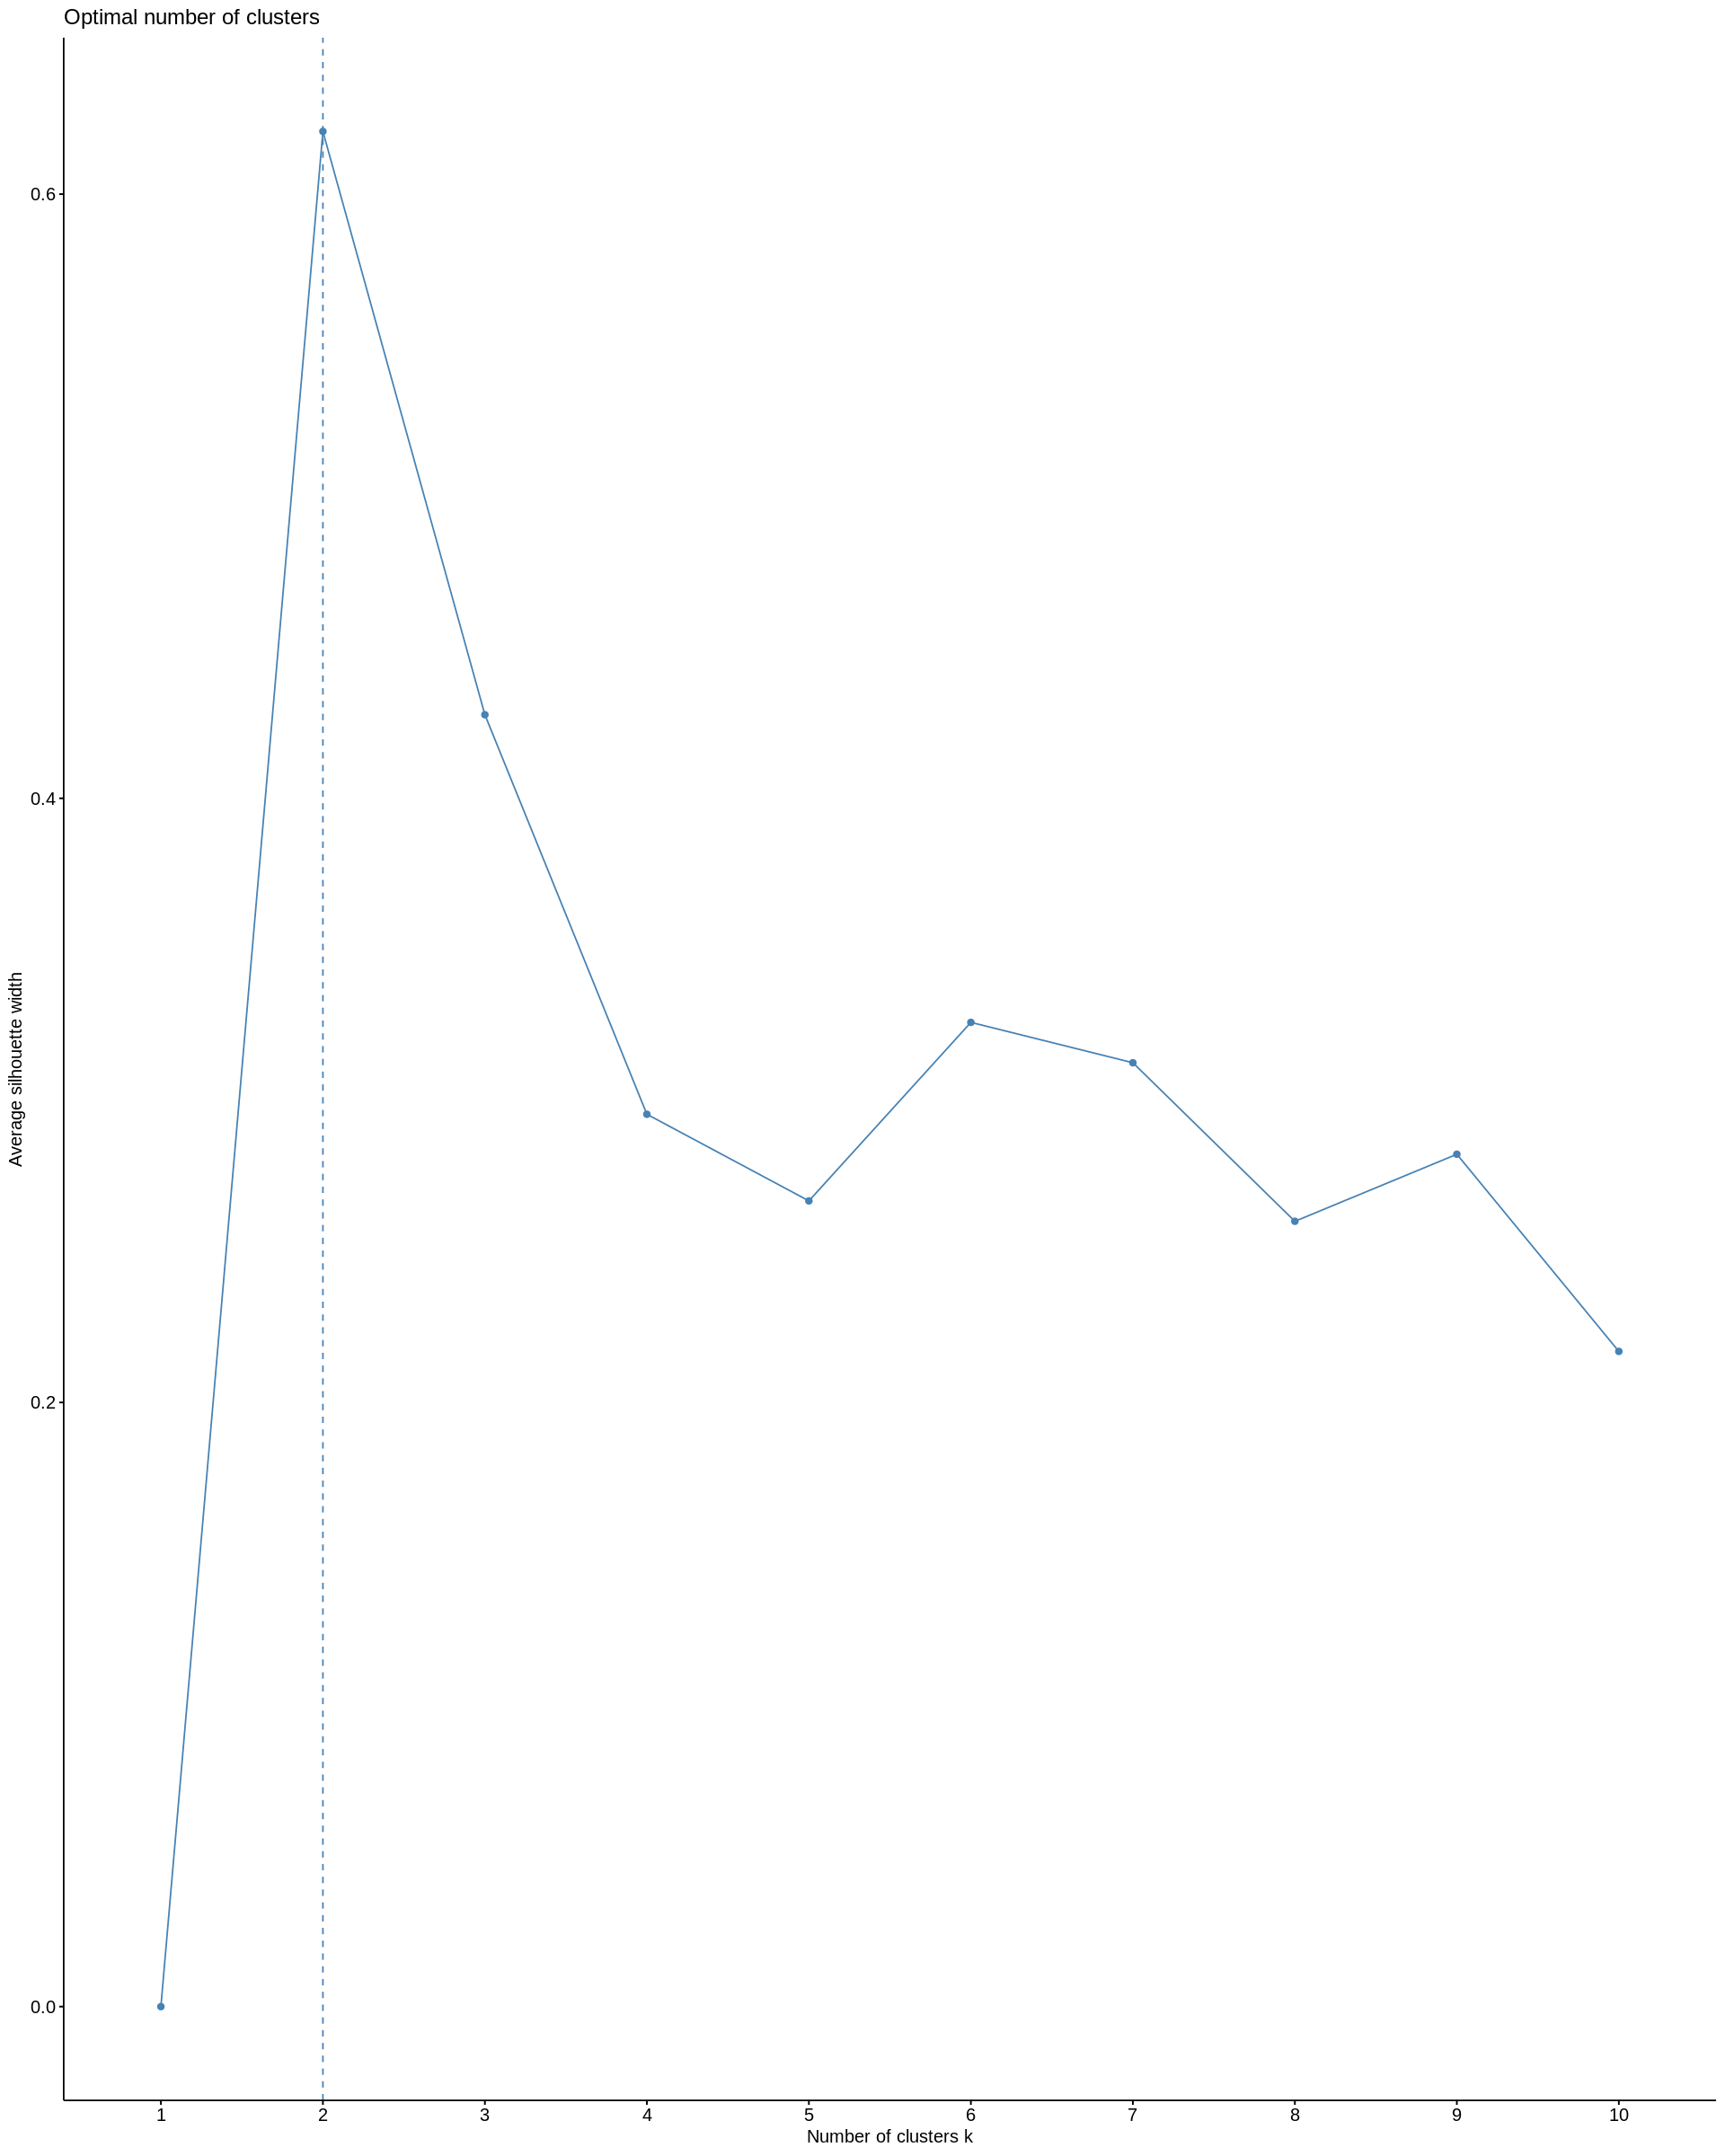

In [94]:
# Plotting the optimal number of clusters

fviz_nbclust(retail, kmeans, method = "silhouette")

- 2 is the optimal number of clusters

In [96]:
# Performing clustering with a k value of 2

kmeans_model = kmeans(retail, 2)

# Checking the cluster centers for each attribute

kmeans_model$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0.08458994,0.02359276,0.02221643,0.014942126,0.04833213,0.020170602,0.12408805,0.2325668,0.01386395,0.06849133,6.203618,0.1590248,0.1100799,0.2627261,0.1596642,2.997916,1.225495,1.139502
2,0.09338308,0.02709105,0.01368336,0.007791559,0.02536157,0.009940335,0.03067892,0.1095183,0.03092443,0.01946500,5.926579,0.1700138,0.1314741,0.3032157,0.1732618,1.035857,1.275470,1.247581


In [97]:
# Checking the number of observations for each cluster

kmeans_model$size

[1] 10559  1757

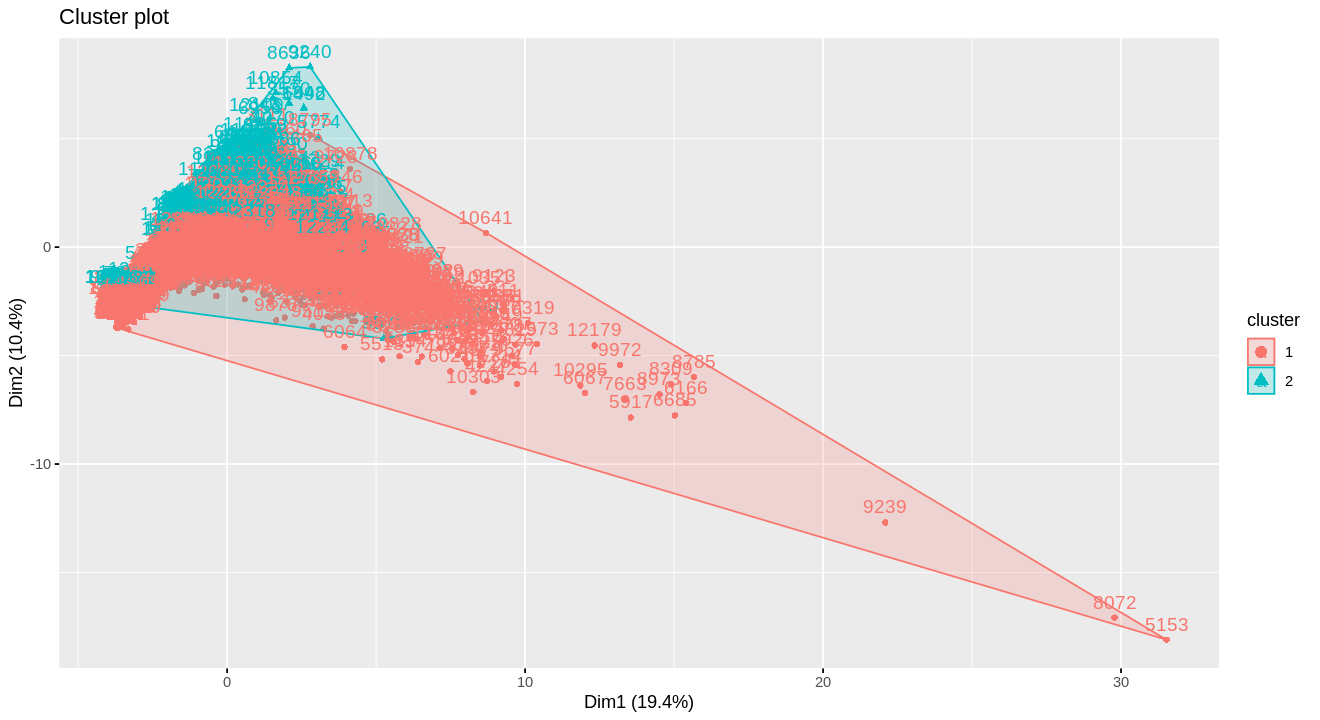

In [99]:
# Visualising the clusters 

fviz_cluster(kmeans_model, retail)

[1] 5545 2776 3995

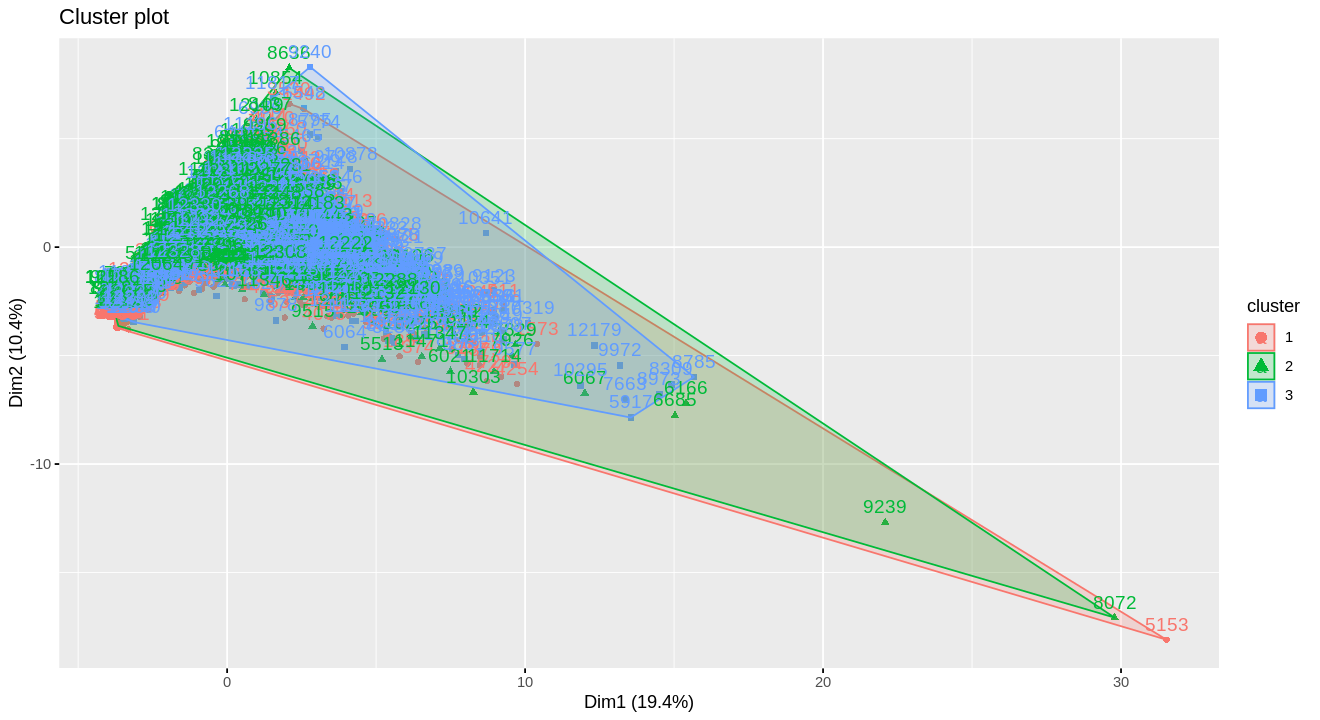

In [100]:
# Performing k-means clustering with a higher k value

kmeans_model2 = kmeans(retail, 3)

# Checking the number of observations for each cluster

kmeans_model2$size

# Visualising the clusters 

fviz_cluster(kmeans_model2, retail)

## Hierarchial Clustering

In [104]:
# Computing the euclidean distance between observations

retail_dist <- dist(retail, method = "euclidean")


In [107]:
# Performing hierarchial clustering

hier_model <- hclust(retail_dist, method = "ward.D2" )

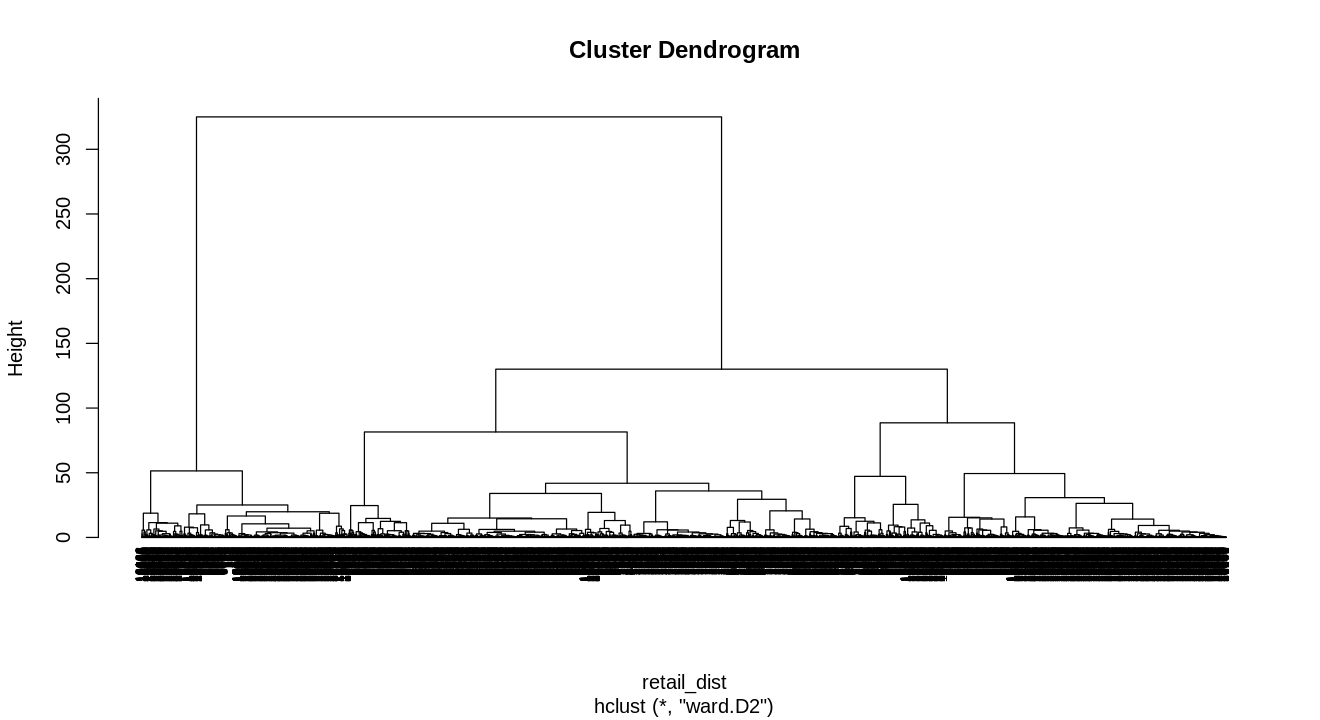

In [108]:
# Visualizing the hierachical dendogram

options(repr.plot.width = 11, repr.plot.height = 6)
plot(hier_model, cex = 0.6, hang = -1)

# Challenging the Solution

From the above analysis, k-means clustering performs best compared to hierarchial clustering. This is because the former has a better, more definedvisual representation of the clusters, which is easy to interpret. The cluster diagram obtained from hierarchial clustering is quite complex and inconclusive which makes it difficult to extract meaningful insights from.

To further improve the analysis, different optimization techniques (for instance analyzing the impact of outliers)can be applied to both clustering methods to find optimal model performance. Other clustering methods such as DBSCAN Clustering can also be investigated to challenge the solution furthefr.